In [5]:
from IPython.core.display import HTML
import logging
from IPython.display import YouTubeVideo



HTML("""
<style>
.container { width:100% !important; }
</style>
""")

## IB Gateway vs TWS
* TWS is full blown application if you want to also make manual trades this is useful, but I recommend light weight ib-gateway
* Make sure you select correct time zone! 
* Master API clientId (I will explain this concept later)
* Remove read only if you want to make trades

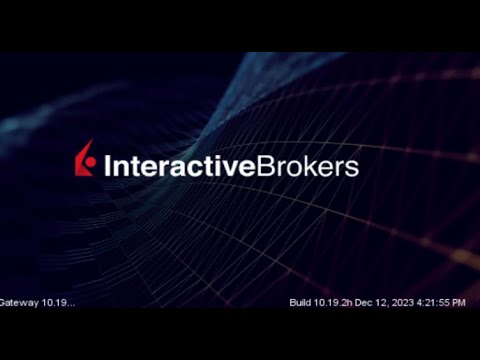

In [4]:
YouTubeVideo('IauW0CVcUCY', width=800, height=300)

## IB-Isnyc/IB-Async
* ib_insync by Ewald De Wit: A fully asynchonous framework based on asyncio and eventkit.
    * https://github.com/erdewit/ib_insync
    * He also create nest_asyncio for using asyncio in Jupyter notebooks!
    * Sadly the legened passed away
* ib_async: Mattsa 
    * https://github.com/ib-api-reloaded/ib_async
    * Maintaining the library
* Experimental groupsio and discord groups
* Install using pip install ib_async

In [ ]:
!pip install ib_async

## Connect to IB
* Specify port/client
* util.startLoop() is needed for Jupyter notebook: BTS it does nest_asyncio.apply()

In [6]:
from ib_async import *
util.startLoop()
ib = IB()
ib.connect(port=4004,clientId=0)

<IB connected to 127.0.0.1:4004 clientId=0>

### Contracts
* Common contracts like Stock, Future, Option, Bond are subclassed.
* ib.qualifyContracts will add info such as conId (need minimal unique info before using it)

In [9]:
contract = Contract(symbol='TSLA',secType='STK',exchange='SMART',currency='USD')
ib.qualifyContracts(contract)
contract

Contract(secType='STK', conId=76792991, symbol='TSLA', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='TSLA', tradingClass='NMS')

In [11]:
stock = Stock(symbol='TSLA',exchange='SMART',currency='USD')
ib.qualifyContracts(stock)

[Stock(conId=76792991, symbol='TSLA', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='TSLA', tradingClass='NMS')]

#### Can also get more contract details with ib.reqContractDetails

In [12]:
amd = Stock(symbol="AMD")
cds = ib.reqContractDetails(amd)

In [15]:
df_amd_contract_details=util.df(cds)
df_amd_contract_details

,contract,marketName,minTick,orderTypes,validExchanges,priceMagnifier,underConId,longName,contractMonth,industry,...,callable,putable,coupon,convertible,maturity,issueDate,nextOptionDate,nextOptionType,nextOptionPartial,notes
0,"Contract(secType='STK', conId=4391, symbol='AM...",NMS,0.0100,"ACTIVETIM,AD,ADJUST,ALERT,ALGO,ALLOC,AON,AVGCO...","SMART,AMEX,NYSE,CBOE,PHLX,ISE,CHX,ARCA,ISLAND,...",1,0,ADVANCED MICRO DEVICES,,Technology,...,False,False,0,False,,,,,False,
1,"Contract(secType='STK', conId=32596680, symbol...",XETRA,0.0001,"ACTIVETIM,AD,ADJUST,ALERT,ALGO,ALGOLTH,ALLOC,A...","SMART,FWB,IBIS,BVME,VSE,SWB,CHIXDE,BATEDE,TGAT...",1,0,ADVANCED MICRO DEVICES,,Technology,...,False,False,0,False,,,,,False,
2,"Contract(secType='STK', conId=530091921, symbo...",AMD,0.0050,"ACTIVETIM,AD,ADJUST,ALERT,ALGO,ALLOC,AVGCOST,B...",SMART,1,0,ADVANCED MICRO DEVICES CDR,,Technology,...,False,False,0,False,,,,,False,
3,"Contract(secType='STK', conId=4391, symbol='AM...",NMS,0.0100,"ACTIVETIM,AD,ADJUST,ALERT,ALLOC,AVGCOST,BASKET...","SMART,AMEX,NYSE,CBOE,PHLX,ISE,CHX,ARCA,ISLAND,...",1,0,ADVANCED MICRO DEVICES,,Technology,...,False,False,0,False,,,,,False,
4,"Contract(secType='STK', conId=4391, symbol='AM...",NMS,0.0100,"ACTIVETIM,AD,ADJUST,ALERT,ALLOC,AVGCOST,BASKET...","SMART,AMEX,NYSE,CBOE,PHLX,ISE,CHX,ARCA,ISLAND,...",1,0,ADVANCED MICRO DEVICES,,Technology,...,False,False,0,False,,,,,False,
5,"Contract(secType='STK', conId=4391, symbol='AM...",NMS,0.0100,"ACTIVETIM,AD,ADJUST,ALERT,ALLOC,AVGCOST,BASKET...","SMART,AMEX,NYSE,CBOE,PHLX,ISE,CHX,ARCA,ISLAND,...",1,0,ADVANCED MICRO DEVICES,,Technology,...,False,False,0,False,,,,,False,
6,"Contract(secType='STK', conId=4391, symbol='AM...",NMS,0.0100,"ACTIVETIM,AD,ADJUST,ALERT,ALLOC,AVGCOST,BASKET...","SMART,AMEX,NYSE,CBOE,PHLX,ISE,CHX,ARCA,ISLAND,...",1,0,ADVANCED MICRO DEVICES,,Technology,...,False,False,0,False,,,,,False,
7,"Contract(secType='STK', conId=4391, symbol='AM...",NMS,0.0100,"ACTIVETIM,AD,ADJUST,ALERT,ALLOC,AVGCOST,BASKET...","SMART,AMEX,NYSE,CBOE,PHLX,ISE,CHX,ARCA,ISLAND,...",1,0,ADVANCED MICRO DEVICES,,Technology,...,False,False,0,False,,,,,False,
8,"Contract(secType='STK', conId=4391, symbol='AM...",NMS,0.0100,"ACTIVETIM,AD,ADJUST,ALERT,ALLOC,AVGCOST,BASKET...","SMART,AMEX,NYSE,CBOE,PHLX,ISE,CHX,ARCA,ISLAND,...",1,0,ADVANCED MICRO DEVICES,,Technology,...,False,False,0,False,,,,,False,
9,"Contract(secType='STK', conId=4391, symbol='AM...",NMS,0.0100,"ACTIVETIM,AD,ADJUST,ALERT,ALLOC,AVGCOST,BASKET...","SMART,AMEX,NYSE,CBOE,PHLX,ISE,CHX,ARCA,ISLAND,...",1,0,ADVANCED MICRO DEVICES,,Technology,...,False,False,0,False,,,,,False,


##### But only 1 contract with currecny == 'USD' and exchange == 'SMART'

In [18]:
util.df(df_amd_contract_details.contract.tolist()).query('currency=="USD" and exchange=="SMART"')

,secType,conId,symbol,lastTradeDateOrContractMonth,strike,right,multiplier,exchange,primaryExchange,currency,localSymbol,tradingClass,includeExpired,secIdType,secId,description,issuerId,comboLegsDescrip,comboLegs,deltaNeutralContract
0,STK,4391,AMD,,0.0,,,SMART,NASDAQ,USD,AMD,NMS,False,,,,,,[],None


### Forex Example 

In [22]:
eurusd = Forex(pair='EURUSD')
util.df(ib.reqContractDetails(eurusd))

,contract,marketName,minTick,orderTypes,validExchanges,priceMagnifier,underConId,longName,contractMonth,industry,...,callable,putable,coupon,convertible,maturity,issueDate,nextOptionDate,nextOptionType,nextOptionPartial,notes
0,"Contract(secType='CASH', conId=12087792, symbo...",EUR.USD,0.00005,"ACTIVETIM,AD,ADJUST,ALERT,ALGO,ALLOC,AVGCOST,B...",IDEALPRO,1,0,European Monetary Union Euro,,,...,False,False,0,False,,,,,False,


##### Option Contract Example

In [24]:
call_option = Option(symbol="TSLA",lastTradeDateOrContractMonth='20240531',strike=170,right='C',exchange='SMART',currency='USD')

In [25]:
put_option = Option(symbol="TSLA",lastTradeDateOrContractMonth='20240531',strike=170,right='P',exchange='SMART',currency='USD')

In [26]:
ib.qualifyContracts(call_option,put_option)

[Option(conId=696450827, symbol='TSLA', lastTradeDateOrContractMonth='20240531', strike=170.0, right='C', multiplier='100', exchange='SMART', currency='USD', localSymbol='TSLA  240531C00170000', tradingClass='TSLA'),
 Option(conId=696453037, symbol='TSLA', lastTradeDateOrContractMonth='20240531', strike=170.0, right='P', multiplier='100', exchange='SMART', currency='USD', localSymbol='TSLA  240531P00170000', tradingClass='TSLA')]

In [27]:
call_option

Option(conId=696450827, symbol='TSLA', lastTradeDateOrContractMonth='20240531', strike=170.0, right='C', multiplier='100', exchange='SMART', currency='USD', localSymbol='TSLA  240531C00170000', tradingClass='TSLA')

#### For non-bag (COMBO) contracts can specify contract by unique conId identifier

In [29]:
call_contract=Contract(conId=call_option.conId)
call_contract
ib.qualifyContracts(call_contract)
call_contract

Contract(secType='OPT', conId=696450827, symbol='TSLA', lastTradeDateOrContractMonth='20240531', strike=170.0, right='C', multiplier='100', exchange='SMART', currency='USD', localSymbol='TSLA  240531C00170000', tradingClass='TSLA')

In [30]:
put_contract=Contract(conId=696453037)
put_contract
ib.qualifyContracts(put_contract)
put_contract

Contract(secType='OPT', conId=696453037, symbol='TSLA', lastTradeDateOrContractMonth='20240531', strike=170.0, right='P', multiplier='100', exchange='SMART', currency='USD', localSymbol='TSLA  240531P00170000', tradingClass='TSLA')

#### Can find matches to symbols with ib.reqMatchingSymbols

In [32]:
matches = ib.reqMatchingSymbols('intc')
matches

[ContractDescription(contract=Contract(secType='STK', conId=270639, symbol='INTC', primaryExchange='NASDAQ', currency='USD', description='INTEL CORP'), derivativeSecTypes=['CFD', 'OPT', 'IOPT', 'WAR', 'BAG']),
 ContractDescription(contract=Contract(secType='STK', conId=12178234, symbol='INTC', primaryExchange='EBS', currency='CHF', description='INTEL CORP'), derivativeSecTypes=[]),
 ContractDescription(contract=Contract(secType='STK', conId=38709539, symbol='INTC', primaryExchange='MEXI', currency='MXN', description='INTEL CORP'), derivativeSecTypes=[]),
 ContractDescription(contract=Contract(secType='STK', conId=622831850, symbol='INTC', primaryExchange='AEQLIT', currency='CAD', description='INTEL CORP - CDR'), derivativeSecTypes=[]),
 ContractDescription(contract=Contract(secType='BOND', conId=-1, description='Intel Corp', issuerId='e1394710'), derivativeSecTypes=[]),
 ContractDescription(contract=Contract(secType='BOND', conId=-1, description='Altera Corp', issuerId='e1394367'), der

In [35]:
matchContracts = [m.contract for m in matches]
util.df(matchContracts)

,secType,conId,symbol,lastTradeDateOrContractMonth,strike,right,multiplier,exchange,primaryExchange,currency,localSymbol,tradingClass,includeExpired,secIdType,secId,description,issuerId,comboLegsDescrip,comboLegs,deltaNeutralContract
0,STK,270639,INTC,,0.0,,,,NASDAQ,USD,,,False,,,INTEL CORP,,,[],None
1,STK,12178234,INTC,,0.0,,,,EBS,CHF,,,False,,,INTEL CORP,,,[],None
2,STK,38709539,INTC,,0.0,,,,MEXI,MXN,,,False,,,INTEL CORP,,,[],None
3,STK,622831850,INTC,,0.0,,,,AEQLIT,CAD,,,False,,,INTEL CORP - CDR,,,[],None
4,BOND,-1,,,0.0,,,,,,,,False,,,Intel Corp,e1394710,,[],None
5,BOND,-1,,,0.0,,,,,,,,False,,,Altera Corp,e1394367,,[],None
6,STK,11463493,INTCUSD,,0.0,,,,EBS,USD,,,False,,,INTEL CORP,,,[],None
7,BOND,-1,,,0.0,,,,,,,,False,,,Intracoastal Bank,e5510710,,[],None
8,BOND,-1,,,0.0,,,,,,,,False,,,Intracoastal Bancorp Inc,e5510711,,[],None
9,BOND,-1,,,0.0,,,,,,,,False,,,Bosshard Banco Ltd,e5178157,,[],None


### Options Chains
#### Can get options chians with with ib.reqSecDefParams
* Get just for exchange = smart
* Get it in dataframe format by using explode method
* Note not all these will be valid. To get valid contracts by doing ib.qualifyContracts on the list of contracts

In [36]:
chains = ib.reqSecDefOptParams(underlyingSymbol=stock.symbol,futFopExchange="",underlyingSecType=stock.secType,underlyingConId=stock.conId)
chains

[OptionChain(exchange='CBOE', underlyingConId='76792991', tradingClass='TSLA', multiplier='100', expirations=['20240531', '20240607', '20240614', '20240621', '20240628', '20240705', '20240719', '20240816', '20240920', '20241018', '20241115', '20241220', '20250117', '20250321', '20250620', '20250919', '20251219', '20260116', '20260618', '20261218'], strikes=[1.67, 3.33, 5.0, 6.67, 8.33, 10.0, 11.67, 13.33, 15.0, 16.67, 20.0, 25.0, 30.0, 33.33, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 66.67, 70.0, 75.0, 80.0, 83.33, 85.0, 90.0, 95.0, 100.0, 105.0, 110.0, 115.0, 116.67, 120.0, 123.33, 125.0, 126.67, 130.0, 133.33, 135.0, 136.0, 136.67, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 143.33, 144.0, 145.0, 146.0, 146.67, 147.0, 148.0, 149.0, 150.0, 152.5, 153.33, 155.0, 156.67, 157.5, 160.0, 162.5, 163.33, 165.0, 166.67, 167.5, 170.0, 172.5, 173.33, 175.0, 177.5, 180.0, 182.5, 183.33, 185.0, 186.67, 187.5, 190.0, 192.5, 193.33, 195.0, 197.5, 200.0, 202.5, 205.0, 206.67, 207.5, 210.0, 212.

In [49]:
chain = [chain for chain in chains if chain.exchange=='SMART'][0]


In [50]:
df_chain=util.df([chain]).explode(['expirations']).explode(['strikes'])
df_chain

,exchange,underlyingConId,tradingClass,multiplier,expirations,strikes
0,SMART,76792991,TSLA,100,20240531,1.67
0,SMART,76792991,TSLA,100,20240531,3.33
0,SMART,76792991,TSLA,100,20240531,5.0
0,SMART,76792991,TSLA,100,20240531,6.67
0,SMART,76792991,TSLA,100,20240531,8.33
...,...,...,...,...,...,...
0,SMART,76792991,TSLA,100,20261218,700.0
0,SMART,76792991,TSLA,100,20261218,716.67
0,SMART,76792991,TSLA,100,20261218,733.33
0,SMART,76792991,TSLA,100,20261218,750.0


##### Get only the valid contracts by qualifying contracts (sometimes some are not valid)
* Between min_strike and max_strike
* Between min_expiry and max_expiry

In [53]:
min_strike = 160 
max_strike = 180
min_expiry='20240528'
max_expiry='20240701'
contracts = []
for expiry in chain.expirations:
    if (expiry<=max_expiry) and (expiry>=min_expiry):
            for strike in chain.strikes:
                if (strike >= min_strike) and (strike <= max_strike):
                    for right in ['C','P']:
                        contract = Option(symbol=stock.symbol, strike=strike, right=right, lastTradeDateOrContractMonth=expiry,
                                              exchange='SMART')
                        contracts.append(contract)
len(contracts)

120

In [56]:
valid_contracts = ib.qualifyContracts(*contracts)

Error 200, reqId 5048: No security definition has been found for the request, contract: Option(symbol='TSLA', lastTradeDateOrContractMonth='20240531', strike=163.33, right='C', exchange='SMART')
Error 200, reqId 5049: No security definition has been found for the request, contract: Option(symbol='TSLA', lastTradeDateOrContractMonth='20240531', strike=163.33, right='P', exchange='SMART')
Error 200, reqId 5052: No security definition has been found for the request, contract: Option(symbol='TSLA', lastTradeDateOrContractMonth='20240531', strike=166.67, right='C', exchange='SMART')
Error 200, reqId 5053: No security definition has been found for the request, contract: Option(symbol='TSLA', lastTradeDateOrContractMonth='20240531', strike=166.67, right='P', exchange='SMART')
Error 200, reqId 5061: No security definition has been found for the request, contract: Option(symbol='TSLA', lastTradeDateOrContractMonth='20240531', strike=173.33, right='P', exchange='SMART')
Error 200, reqId 5060: No

Unknown contract: Option(symbol='TSLA', lastTradeDateOrContractMonth='20240614', strike=173.33, right='C', exchange='SMART')
Unknown contract: Option(symbol='TSLA', lastTradeDateOrContractMonth='20240614', strike=173.33, right='P', exchange='SMART')
Unknown contract: Option(symbol='TSLA', lastTradeDateOrContractMonth='20240628', strike=162.5, right='C', exchange='SMART')
Unknown contract: Option(symbol='TSLA', lastTradeDateOrContractMonth='20240628', strike=162.5, right='P', exchange='SMART')
Unknown contract: Option(symbol='TSLA', lastTradeDateOrContractMonth='20240628', strike=163.33, right='C', exchange='SMART')
Unknown contract: Option(symbol='TSLA', lastTradeDateOrContractMonth='20240628', strike=163.33, right='P', exchange='SMART')
Unknown contract: Option(symbol='TSLA', lastTradeDateOrContractMonth='20240628', strike=166.67, right='C', exchange='SMART')
Unknown contract: Option(symbol='TSLA', lastTradeDateOrContractMonth='20240628', strike=166.67, right='P', exchange='SMART')
Un

In [58]:
len(valid_contracts),len(contracts)

(88, 120)

### Combo contracts using Bag  contract
* comboLegs can't have common denominator

#### Let's set contract = TSLA stock for later examples since it is very active lol!

In [101]:
contract = Stock(symbol='TSLA',exchange='SMART',currency='USD')
ib.qualifyContracts(contract)

[Stock(conId=76792991, symbol='TSLA', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='TSLA', tradingClass='NMS')]



## Additional info in Past Videos

### Option Videos 
1. Intro to Options with IB-Insync API

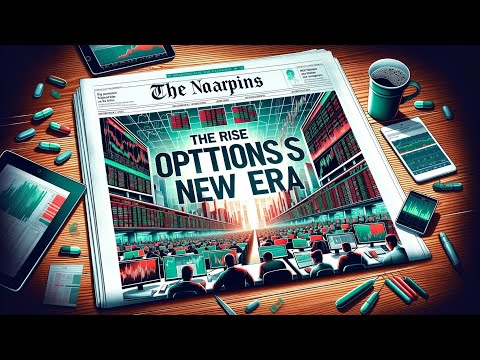

In [59]:
YouTubeVideo('iUS5-ZURPuM', width=800, height=300)

2. More on Options with application to Volatility Smile

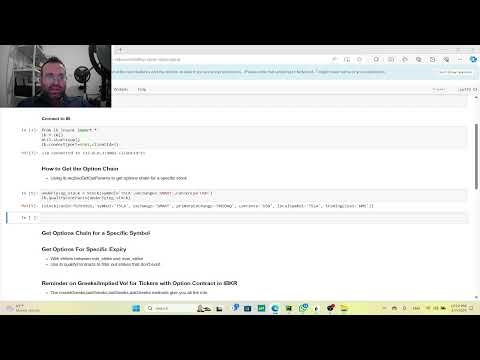

In [60]:
YouTubeVideo('juhi5NpBBro', width=800, height=300)

3. Combo contract example + Greeks

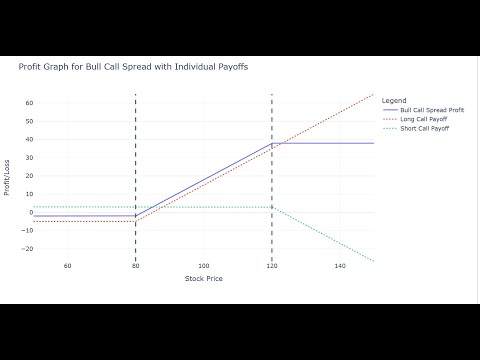

In [61]:
YouTubeVideo('lv-Sabs9150', width=800, height=300)

4. Combo trades with IBKR API

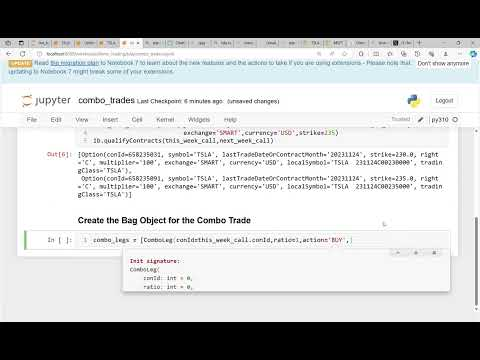

In [62]:
YouTubeVideo('PhDGau0XZMY', width=800, height=300)

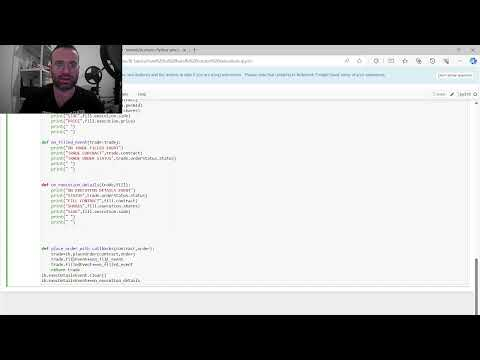

In [63]:
YouTubeVideo('XnY40xQMBhU', width=800, height=300)

### Viewing Positions

In [64]:
ib.positions()

[Position(account='DU7351505', contract=Option(conId=696450827, symbol='TSLA', lastTradeDateOrContractMonth='20240531', strike=170.0, right='C', multiplier='100', currency='USD', localSymbol='TSLA  240531C00170000', tradingClass='TSLA'), position=6.0, avgCost=733.19685),
 Position(account='DU7351505', contract=Stock(conId=76792991, symbol='TSLA', exchange='NASDAQ', currency='USD', localSymbol='TSLA', tradingClass='NMS'), position=320.0, avgCost=178.390625)]

In [65]:
ib.portfolio()

[PortfolioItem(contract=Stock(conId=76792991, symbol='TSLA', right='0', primaryExchange='NASDAQ', currency='USD', localSymbol='TSLA', tradingClass='NMS'), position=320.0, marketPrice=175.8699951, marketValue=56278.4, averageCost=178.390625, unrealizedPNL=-806.6, realizedPNL=0.0, account='DU7351505'),
 PortfolioItem(contract=Option(conId=696450827, symbol='TSLA', lastTradeDateOrContractMonth='20240531', strike=170.0, right='C', multiplier='100', primaryExchange='AMEX', currency='USD', localSymbol='TSLA  240531C00170000', tradingClass='TSLA'), position=6.0, marketPrice=6.53732345, marketValue=3922.39, averageCost=733.19685, unrealizedPNL=-476.79, realizedPNL=0.0, account='DU7351505')]

##### Use utiil.df to view as dataframe

In [67]:
df_positions = util.df(ib.positions())
df_positions

,account,contract,position,avgCost
0,DU7351505,"Option(conId=696450827, symbol='TSLA', lastTra...",6.0,733.196850
1,DU7351505,"Stock(conId=76792991, symbol='TSLA', exchange=...",320.0,178.390625


#### Can parse the positions to view them in a nicer way

In [73]:
df_positions['symbol']=df_positions.contract.apply(lambda l:l.symbol)
df_positions['sec_type']=df_positions.contract.apply(lambda l:l.secType)
df_positions['right']=df_positions.contract.apply(lambda l:l.right if l.secType=='OPT' else None)
df_positions['strike']=df_positions.contract.apply(lambda l:l.strike if l.secType=='OPT' else None)
df_positions['expiration']=df_positions.contract.apply(lambda l:l.lastTradeDateOrContractMonth if l.secType=='OPT' else None)
df_positions

,account,contract,position,avgCost,symbol,sec_type,right,strike,expiration
0,DU7351505,"Option(conId=696450827, symbol='TSLA', lastTra...",6.0,733.196850,TSLA,OPT,C,170.0,20240531
1,DU7351505,"Stock(conId=76792991, symbol='TSLA', exchange=...",320.0,178.390625,TSLA,STK,None,NaN,None


### Note on Requests vs "Current State"
* If the connection succeeded, then ib will be synchronized with TWS/IBG. The "current state" is now available via methods such as ib.positions(), ib.trades(), ib.openTrades(), ib.accountValues() or ib.tickers().
* You can also send a request to get the state, but the current state should be syncronized, but it is less efficient and blocking!



In [74]:
ib.positions(), ib.reqPositions()

([Position(account='DU7351505', contract=Option(conId=696450827, symbol='TSLA', lastTradeDateOrContractMonth='20240531', strike=170.0, right='C', multiplier='100', currency='USD', localSymbol='TSLA  240531C00170000', tradingClass='TSLA'), position=6.0, avgCost=733.19685),
  Position(account='DU7351505', contract=Stock(conId=76792991, symbol='TSLA', exchange='NASDAQ', currency='USD', localSymbol='TSLA', tradingClass='NMS'), position=320.0, avgCost=178.390625)],
 [Position(account='DU7351505', contract=Option(conId=696450827, symbol='TSLA', lastTradeDateOrContractMonth='20240531', strike=170.0, right='C', multiplier='100', currency='USD', localSymbol='TSLA  240531C00170000', tradingClass='TSLA'), position=6.0, avgCost=733.19685),
  Position(account='DU7351505', contract=Stock(conId=76792991, symbol='TSLA', exchange='NASDAQ', currency='USD', localSymbol='TSLA', tradingClass='NMS'), position=320.0, avgCost=178.390625)])

### Viewing Account Info
* ib.accountSummary
* ib.accountValues
* both give diff info like related to margin/balance and things like that

##### Look at ib.accountSummary

In [75]:
ib.accountSummary()

[AccountValue(account='DU7351505', tag='AccountType', value='TRUST', currency='', modelCode=''),
 AccountValue(account='DU7351505', tag='Cushion', value='0.966242', currency='', modelCode=''),
 AccountValue(account='DU7351505', tag='DayTradesRemaining', value='-1', currency='', modelCode=''),
 AccountValue(account='DU7351505', tag='DayTradesRemainingT+1', value='-1', currency='', modelCode=''),
 AccountValue(account='DU7351505', tag='DayTradesRemainingT+2', value='-1', currency='', modelCode=''),
 AccountValue(account='DU7351505', tag='DayTradesRemainingT+3', value='-1', currency='', modelCode=''),
 AccountValue(account='DU7351505', tag='DayTradesRemainingT+4', value='-1', currency='', modelCode=''),
 AccountValue(account='DU7351505', tag='LookAheadNextChange', value='1717075800', currency='', modelCode=''),
 AccountValue(account='DU7351505', tag='AccruedCash', value='-1116.68', currency='USD', modelCode=''),
 AccountValue(account='DU7351505', tag='AvailableFunds', value='943159.78', c

In [76]:
df_account_summary = util.df(ib.accountSummary())
df_account_summary

,account,tag,value,currency,modelCode
0,DU7351505,AccountType,TRUST,,
1,DU7351505,Cushion,0.966242,,
2,DU7351505,DayTradesRemaining,-1,,
3,DU7351505,DayTradesRemainingT+1,-1,,
4,DU7351505,DayTradesRemainingT+2,-1,,
...,...,...,...,...,...
100,All,FxCashBalance,0.00,BASE,
101,All,AccountOrGroup,All,BASE,
102,All,RealCurrency,BASE,BASE,
103,All,IssuerOptionValue,0.00,BASE,


#### For example net liquidation value

In [79]:
df_account_summary[df_account_summary.tag.str.contains('netliquidation',case=False)]

,account,tag,value,currency,modelCode
24,DU7351505,NetLiquidation,979423.23,USD,
38,All,NetLiquidationByCurrency,724560.00,ILS,
63,All,NetLiquidationByCurrency,783911.9259,USD,
88,All,NetLiquidationByCurrency,979423.2257,BASE,


##### Can also look at ib.accountValues

In [80]:
ib.accountValues()

[AccountValue(account='DU7351505', tag='AccountCode', value='DU7351505', currency='', modelCode=''),
 AccountValue(account='DU7351505', tag='AccountOrGroup', value='DU7351505', currency='BASE', modelCode=''),
 AccountValue(account='DU7351505', tag='AccountOrGroup', value='DU7351505', currency='ILS', modelCode=''),
 AccountValue(account='DU7351505', tag='AccountOrGroup', value='DU7351505', currency='USD', modelCode=''),
 AccountValue(account='DU7351505', tag='AccountReady', value='true', currency='', modelCode=''),
 AccountValue(account='DU7351505', tag='AccountType', value='TRUST', currency='', modelCode=''),
 AccountValue(account='DU7351505', tag='AccruedCash', value='-1116.68', currency='BASE', modelCode=''),
 AccountValue(account='DU7351505', tag='AccruedCash', value='0.00', currency='ILS', modelCode=''),
 AccountValue(account='DU7351505', tag='AccruedCash', value='-1116.68', currency='USD', modelCode=''),
 AccountValue(account='DU7351505', tag='AccruedCash-C', value='0.00', currenc

In [81]:
df_account_values = util.df(ib.accountValues())
df_account_values

,account,tag,value,currency,modelCode
0,DU7351505,AccountCode,DU7351505,,
1,DU7351505,AccountOrGroup,DU7351505,BASE,
2,DU7351505,AccountOrGroup,DU7351505,ILS,
3,DU7351505,AccountOrGroup,DU7351505,USD,
4,DU7351505,AccountReady,true,,
...,...,...,...,...,...
175,DU7351505,WarrantValue,0.00,USD,
176,DU7351505,WhatIfPMEnabled,true,,
177,DU7351505,Cryptocurrency,,ILS,
178,DU7351505,Cryptocurrency,,USD,


##### Can see what tags there are 

In [82]:
df_account_values.tag.tolist()

['AccountCode',
 'AccountOrGroup',
 'AccountOrGroup',
 'AccountOrGroup',
 'AccountReady',
 'AccountType',
 'AccruedCash',
 'AccruedCash',
 'AccruedCash',
 'AccruedCash-C',
 'AccruedCash-S',
 'AccruedDividend',
 'AccruedDividend-C',
 'AccruedDividend-S',
 'AvailableFunds',
 'AvailableFunds-C',
 'AvailableFunds-S',
 'Billable',
 'Billable-C',
 'Billable-S',
 'BuyingPower',
 'CashBalance',
 'CashBalance',
 'CashBalance',
 'ColumnPrio-C',
 'ColumnPrio-S',
 'CorporateBondValue',
 'CorporateBondValue',
 'CorporateBondValue',
 'Currency',
 'Currency',
 'Currency',
 'Cushion',
 'DayTradesRemaining',
 'DayTradesRemainingT+1',
 'DayTradesRemainingT+2',
 'DayTradesRemainingT+3',
 'DayTradesRemainingT+4',
 'DayTradingStatus-S',
 'EquityWithLoanValue',
 'EquityWithLoanValue-C',
 'EquityWithLoanValue-S',
 'ExcessLiquidity',
 'ExcessLiquidity-C',
 'ExcessLiquidity-S',
 'ExchangeRate',
 'ExchangeRate',
 'ExchangeRate',
 'FullAvailableFunds',
 'FullAvailableFunds-C',
 'FullAvailableFunds-S',
 'FullExce

## Ordering (WARNING THIS WILL MAKE REAL ORDERS SO DO NOT RUN!!!!!)
* Many types of orders available with conditions! GTC,Time Condition, Condition on other contract's price, margin condition, Market on Close, etc...
* Most common ones are subclassed LimitOrder, MarketOrder, StopOrder, StopLimitOrder
* Bracket orders and parent child orders are also possible. 


### Placing Orders
* Inputs: order + contract
* Outputs: trade object

In [87]:
order = Order(totalQuantity=1,lmtPrice=170,orderType='LMT',action='BUY')
order.orderId

0

In [88]:
trade = ib.placeOrder(contract,order)

#### Trade object
* order
* orderStatus
* fills
* log
* advanedError

In [89]:
trade.order

Order(orderId=5166, permId=1398246939, action='BUY', totalQuantity=1.0, orderType='LMT', lmtPrice=170.0, auxPrice=0.0)

In [90]:
trade.orderStatus

OrderStatus(orderId=5166, status='Submitted', filled=0.0, remaining=1.0, avgFillPrice=0.0, permId=1398246939, parentId=0, lastFillPrice=0.0, clientId=0, whyHeld='', mktCapPrice=15.47)

In [91]:
trade.fills

[]

In [100]:
trade.log

[TradeLogEntry(time=datetime.datetime(2024, 5, 29, 20, 55, 41, 13055, tzinfo=datetime.timezone.utc), status='PendingSubmit', message='', errorCode=0),
 TradeLogEntry(time=datetime.datetime(2024, 5, 29, 20, 55, 41, 195193, tzinfo=datetime.timezone.utc), status='PreSubmitted', message='', errorCode=0),
 TradeLogEntry(time=datetime.datetime(2024, 5, 29, 20, 55, 41, 202293, tzinfo=datetime.timezone.utc), status='Submitted', message='', errorCode=0),
 TradeLogEntry(time=datetime.datetime(2024, 5, 29, 20, 58, 18, 315223, tzinfo=datetime.timezone.utc), status='Submitted', message='Modify', errorCode=0),
 TradeLogEntry(time=datetime.datetime(2024, 5, 29, 20, 58, 18, 490225, tzinfo=datetime.timezone.utc), status='Submitted', message='Modified', errorCode=0),
 TradeLogEntry(time=datetime.datetime(2024, 5, 29, 20, 58, 22, 263850, tzinfo=datetime.timezone.utc), status='Submitted', message='Modify', errorCode=0),
 TradeLogEntry(time=datetime.datetime(2024, 5, 29, 20, 58, 22, 436004, tzinfo=datetime

In [93]:
trade.advancedError

''

### Modifying Orders
* Just modify an existing order (by orderId)
* First get the existing order and then change the lmtPrice

In [99]:
order = trade.order
order.lmtPrice = 160
trade = ib.placeOrder(contract,order)
trade.order

Order(orderId=5166, permId=1398246939, action='BUY', totalQuantity=1.0, orderType='LMT', lmtPrice=160, auxPrice=0.0)

### Cancelling Orders


In [129]:
ib.openOrders()

[StopOrder(orderId=5168, permId=1398246941, action='BUY', totalQuantity=100.0, lmtPrice=0.0, auxPrice=200.0),
 Order(orderId=5169, permId=1398246942, action='BUY', totalQuantity=100.0, orderType='STP', lmtPrice=0.0, auxPrice=100.0)]

In [130]:
for order in ib.openOrders():
    ib.cancelOrder(order)

In [131]:
ib.openOrders()

[]

### Market Order 

In [108]:
market_order = MarketOrder("BUY",100)
ib.placeOrder(contract,market_order)

Trade(contract=Option(conId=702566587, symbol='TSLA', lastTradeDateOrContractMonth='20240628', strike=180.0, right='P', multiplier='100', exchange='SMART', currency='USD', localSymbol='TSLA  240628P00180000', tradingClass='TSLA'), order=MarketOrder(orderId=5167, action='BUY', totalQuantity=100), orderStatus=OrderStatus(orderId=5167, status='PendingSubmit', filled=0.0, remaining=0.0, avgFillPrice=0.0, permId=0, parentId=0, lastFillPrice=0.0, clientId=0, whyHeld='', mktCapPrice=0.0), fills=[], log=[TradeLogEntry(time=datetime.datetime(2024, 5, 29, 21, 0, 45, 146656, tzinfo=datetime.timezone.utc), status='PendingSubmit', message='', errorCode=0)], advancedError='')

### Stop Order

In [117]:
stop_order = StopOrder("BUY",totalQuantity=100,stopPrice=200)
ib.placeOrder(contract,stop_order)

Trade(contract=Option(conId=702566587, symbol='TSLA', lastTradeDateOrContractMonth='20240628', strike=180.0, right='P', multiplier='100', exchange='SMART', currency='USD', localSymbol='TSLA  240628P00180000', tradingClass='TSLA'), order=StopOrder(orderId=5168, action='BUY', totalQuantity=100, auxPrice=200), orderStatus=OrderStatus(orderId=5168, status='PendingSubmit', filled=0.0, remaining=0.0, avgFillPrice=0.0, permId=0, parentId=0, lastFillPrice=0.0, clientId=0, whyHeld='', mktCapPrice=0.0), fills=[], log=[TradeLogEntry(time=datetime.datetime(2024, 5, 29, 21, 3, 14, 119184, tzinfo=datetime.timezone.utc), status='PendingSubmit', message='', errorCode=0)], advancedError='')

* This is equivalent (note that auxPrice is stopPrice)

In [120]:
stop_order = Order(action="BUY",totalQuantity=100,auxPrice=100,orderType='STP')
ib.placeOrder(contract,stop_order)

Trade(contract=Option(conId=702566587, symbol='TSLA', lastTradeDateOrContractMonth='20240628', strike=180.0, right='P', multiplier='100', exchange='SMART', currency='USD', localSymbol='TSLA  240628P00180000', tradingClass='TSLA'), order=Order(orderId=5169, action='BUY', totalQuantity=100, orderType='STP', auxPrice=100), orderStatus=OrderStatus(orderId=5169, status='PendingSubmit', filled=0.0, remaining=0.0, avgFillPrice=0.0, permId=0, parentId=0, lastFillPrice=0.0, clientId=0, whyHeld='', mktCapPrice=0.0), fills=[], log=[TradeLogEntry(time=datetime.datetime(2024, 5, 29, 21, 3, 54, 759479, tzinfo=datetime.timezone.utc), status='PendingSubmit', message='', errorCode=0)], advancedError='')

### Look at Open Orders 

In [121]:
ib.openOrders()

[StopOrder(orderId=5168, permId=1398246941, action='BUY', totalQuantity=100.0, lmtPrice=0.0, auxPrice=200.0),
 Order(orderId=5169, permId=1398246942, action='BUY', totalQuantity=100.0, orderType='STP', lmtPrice=0.0, auxPrice=100.0)]

### Open trades

In [124]:
ib.openTrades()

[Trade(contract=Option(conId=702566587, symbol='TSLA', lastTradeDateOrContractMonth='20240628', strike=180.0, right='P', multiplier='100', exchange='SMART', currency='USD', localSymbol='TSLA  240628P00180000', tradingClass='TSLA'), order=StopOrder(orderId=5168, permId=1398246941, action='BUY', totalQuantity=100.0, lmtPrice=0.0, auxPrice=200.0), orderStatus=OrderStatus(orderId=5168, status='PreSubmitted', filled=0.0, remaining=100.0, avgFillPrice=0.0, permId=1398246941, parentId=0, lastFillPrice=0.0, clientId=0, whyHeld='trigger', mktCapPrice=0.0), fills=[], log=[TradeLogEntry(time=datetime.datetime(2024, 5, 29, 21, 3, 14, 119184, tzinfo=datetime.timezone.utc), status='PendingSubmit', message='', errorCode=0), TradeLogEntry(time=datetime.datetime(2024, 5, 29, 21, 3, 14, 296563, tzinfo=datetime.timezone.utc), status='PreSubmitted', message='', errorCode=0)], advancedError=''),
 Trade(contract=Option(conId=702566587, symbol='TSLA', lastTradeDateOrContractMonth='20240628', strike=180.0, ri

### Look at trades

In [125]:
ib.trades()

[Trade(contract=Option(conId=696450827, symbol='TSLA', lastTradeDateOrContractMonth='20240531', strike=170.0, right='C', multiplier='100', exchange='SMART', currency='USD', localSymbol='TSLA  240531C00170000', tradingClass='TSLA'), order=Order(permId=1736022441, action='BUY', totalQuantity=3.0, orderType='LMT', lmtPrice=9.0, auxPrice=0.0, tif='DAY', ocaType=3, displaySize=2147483647, rule80A='0', openClose='', volatilityType=0, deltaNeutralOrderType='None', referencePriceType=0, account='DU7351505', clearingIntent='IB', cashQty=0.0, dontUseAutoPriceForHedge=True, filledQuantity=0.0, refFuturesConId=2147483647, shareholder='Not an insider or substantial shareholder'), orderStatus=OrderStatus(orderId=0, status='Cancelled', filled=0.0, remaining=0.0, avgFillPrice=0.0, permId=0, parentId=0, lastFillPrice=0.0, clientId=0, whyHeld='', mktCapPrice=0.0), fills=[], log=[], advancedError=''),
 Trade(contract=Option(conId=696450827, symbol='TSLA', lastTradeDateOrContractMonth='20240531', strike=1

In [126]:
ib.orders()

[Order(permId=1736022441, action='BUY', totalQuantity=3.0, orderType='LMT', lmtPrice=9.0, auxPrice=0.0, tif='DAY', ocaType=3, displaySize=2147483647, rule80A='0', openClose='', volatilityType=0, deltaNeutralOrderType='None', referencePriceType=0, account='DU7351505', clearingIntent='IB', cashQty=0.0, dontUseAutoPriceForHedge=True, filledQuantity=0.0, refFuturesConId=2147483647, shareholder='Not an insider or substantial shareholder'),
 Order(permId=1736022440, action='BUY', orderType='LMT', lmtPrice=8.0, auxPrice=0.0, tif='DAY', ocaType=3, displaySize=2147483647, rule80A='0', openClose='', volatilityType=0, deltaNeutralOrderType='None', referencePriceType=0, account='DU7351505', clearingIntent='IB', cashQty=0.0, dontUseAutoPriceForHedge=True, filledQuantity=3.0, refFuturesConId=2147483647, shareholder='Not an insider or substantial shareholder'),
 Order(permId=1736022439, action='BUY', orderType='LMT', lmtPrice=7.0, auxPrice=0.0, tif='DAY', ocaType=3, displaySize=2147483647, rule80A='0

### Look at Fills

In [127]:
ib.fills()

[Fill(contract=Option(conId=696450827, symbol='TSLA', lastTradeDateOrContractMonth='20240531', strike=170.0, right='C', multiplier='100', exchange='SMART', currency='USD', localSymbol='TSLA  240531C00170000', tradingClass='TSLA'), execution=Execution(execId='00020056.6656d663.01.01', time=datetime.datetime(2024, 5, 29, 18, 56, 8, tzinfo=datetime.timezone.utc), acctNumber='DU7351505', exchange='BOX', side='BOT', shares=3.0, price=7.65, permId=1736022440, clientId=0, orderId=5024, liquidation=0, cumQty=3.0, avgPrice=7.65, orderRef='', evRule='', evMultiplier=0.0, modelCode='', lastLiquidity=2, pendingPriceRevision=False), commissionReport=CommissionReport(execId='00020056.6656d663.01.01', commission=2.09055, currency='USD', realizedPNL=0.0, yield_=0.0, yieldRedemptionDate=0), time=datetime.datetime(2024, 5, 29, 18, 56, 8, tzinfo=datetime.timezone.utc)),
 Fill(contract=Option(conId=696450827, symbol='TSLA', lastTradeDateOrContractMonth='20240531', strike=170.0, right='C', multiplier='100'

In [128]:
len(ib.fills())

2

#### As you see none of the orders were filled!
* This is because we are after hours and you cannot do market orders after hours.
* So we need to specify outsideRTH=True if want to do it premarket


### Placing limit Order with outsideRth = True

In [145]:
limit_order_outside_rth=LimitOrder(action='BUY',totalQuantity=100,lmtPrice=180,outsideRth=True)
trade = ib.placeOrder(stock,limit_order_outside_rth)

In [148]:
len(ib.fills())

4

In [147]:
trade.orderStatus.status

'Filled'

In [146]:
ib.positions()

[Position(account='DU7351505', contract=Option(conId=696450827, symbol='TSLA', lastTradeDateOrContractMonth='20240531', strike=170.0, right='C', multiplier='100', currency='USD', localSymbol='TSLA  240531C00170000', tradingClass='TSLA'), position=6.0, avgCost=733.19685),
 Position(account='DU7351505', contract=Stock(conId=76792991, symbol='TSLA', exchange='NASDAQ', currency='USD', localSymbol='TSLA', tradingClass='NMS'), position=421.0, avgCost=177.6779097387174)]

##### NOTE:
* PlaceOrder is not blocking and will not wait on what happens with the order. To make the order placement blocking, that is to wait until the order is either filled or canceled, consider the following:


In [150]:
limit_order_outside_rth = LimitOrder(action='BUY',totalQuantity=100,lmtPrice=180,outsideRth=True)

trade = ib.placeOrder(stock,limit_order_outside_rth)
print(trade.orderStatus)
while not trade.isDone():
    print(trade.orderStatus)
    ib.waitOnUpdate()

OrderStatus(orderId=5176, status='PendingSubmit', filled=0.0, remaining=0.0, avgFillPrice=0.0, permId=0, parentId=0, lastFillPrice=0.0, clientId=0, whyHeld='', mktCapPrice=0.0)
OrderStatus(orderId=5176, status='PendingSubmit', filled=0.0, remaining=0.0, avgFillPrice=0.0, permId=0, parentId=0, lastFillPrice=0.0, clientId=0, whyHeld='', mktCapPrice=0.0)
OrderStatus(orderId=5176, status='PreSubmitted', filled=0.0, remaining=100.0, avgFillPrice=0.0, permId=1398246949, parentId=0, lastFillPrice=0.0, clientId=0, whyHeld='', mktCapPrice=0.0)
OrderStatus(orderId=5176, status='PreSubmitted', filled=0.0, remaining=100.0, avgFillPrice=0.0, permId=1398246949, parentId=0, lastFillPrice=0.0, clientId=0, whyHeld='', mktCapPrice=0.0)


In [151]:
trade.orderStatus

OrderStatus(orderId=5176, status='Filled', filled=100.0, remaining=0.0, avgFillPrice=175.39, permId=1398246949, parentId=0, lastFillPrice=175.39, clientId=0, whyHeld='', mktCapPrice=0.0)

### Aditional videos on more advanced 
1. Trailing Stop Orders

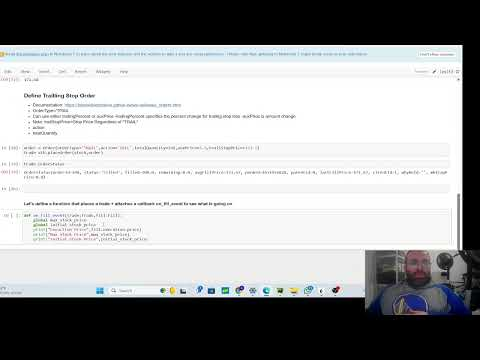

In [152]:
YouTubeVideo('2lboKU1CqOs', width=800, height=300)

2. Bracket Orders and Parent Child Orders with IB-Insync

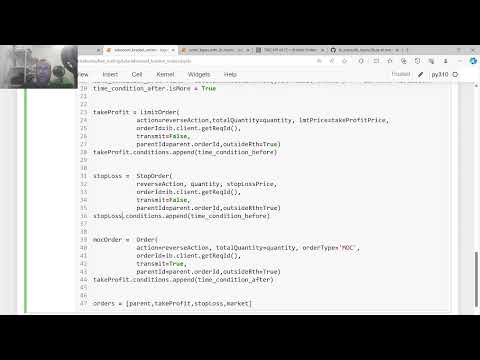

In [153]:
YouTubeVideo('D76CjP2fbhg', width=800, height=300)

3. One-cancels-All (OCA) Orders with Interactive Brokers with IB-Insync

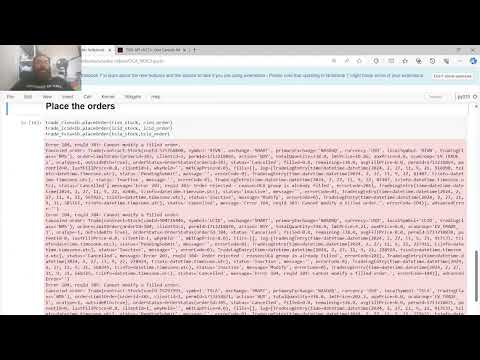

In [154]:
YouTubeVideo('Yq3dXXVgzOk', width=800, height=300)

4. Conditional Orders with IB-Insnyc
* I.E. Only BUY NVDA if AMD under 200$ 

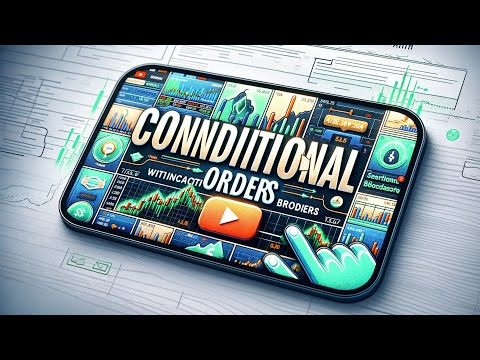

In [155]:
YouTubeVideo('XgUE0fhIfh0', width=800, height=300)

## Market Data
* Need a few subscriptions!
* US Equity and Options Add-On Streaming Bundle (NP) - Trader Workstation
* US Securities Snapshot and Futures Value Bundle (NP,L1) - Trader Workstation ( Waived if monthly commissions reach 30 USD )
* A subscription is per user! I recommend you use 2 users so you can see your live trades in your phone because ohterwise it disconnects!


### Historical Bars
* Live Updates = True (if internet messes up you are screwed)

In [156]:
bars = ib.reqHistoricalData(contract=stock,endDateTime='',durationStr='3 D',barSizeSetting='5 mins',whatToShow='TRADES',useRTH=False,keepUpToDate=True)

In [157]:
bars

[BarData(date=datetime.datetime(2024, 5, 24, 4, 0, tzinfo=zoneinfo.ZoneInfo(key='US/Eastern')), open=174.04, high=174.59, low=174.04, close=174.5, volume=7848.0, average=174.399, barCount=37),
 BarData(date=datetime.datetime(2024, 5, 24, 4, 5, tzinfo=zoneinfo.ZoneInfo(key='US/Eastern')), open=174.49, high=174.5, low=174.46, close=174.49, volume=2375.0, average=174.49, barCount=18),
 BarData(date=datetime.datetime(2024, 5, 24, 4, 10, tzinfo=zoneinfo.ZoneInfo(key='US/Eastern')), open=174.49, high=174.86, low=174.48, close=174.86, volume=4221.0, average=174.703, barCount=29),
 BarData(date=datetime.datetime(2024, 5, 24, 4, 15, tzinfo=zoneinfo.ZoneInfo(key='US/Eastern')), open=174.86, high=174.92, low=174.64, close=174.64, volume=2346.0, average=174.808, barCount=20),
 BarData(date=datetime.datetime(2024, 5, 24, 4, 20, tzinfo=zoneinfo.ZoneInfo(key='US/Eastern')), open=174.7, high=174.75, low=174.7, close=174.75, volume=900.0, average=174.709, barCount=7),
 BarData(date=datetime.datetime(20

### Press enter a few times as you see it gets updated!

In [180]:
len(bars)

544

In [181]:
util.df(bars)

,date,open,high,low,close,volume,average,barCount
0,2024-05-24 04:00:00-04:00,174.04,174.59,174.04,174.50,7848.0,174.399000,37
1,2024-05-24 04:05:00-04:00,174.49,174.50,174.46,174.49,2375.0,174.490000,18
2,2024-05-24 04:10:00-04:00,174.49,174.86,174.48,174.86,4221.0,174.703000,29
3,2024-05-24 04:15:00-04:00,174.86,174.92,174.64,174.64,2346.0,174.808000,20
4,2024-05-24 04:20:00-04:00,174.70,174.75,174.70,174.75,900.0,174.709000,7
...,...,...,...,...,...,...,...,...
539,2024-05-29 16:55:00-04:00,175.33,175.49,175.33,175.40,11116.0,175.397000,31
540,2024-05-29 17:00:00-04:00,175.40,175.48,175.32,175.33,4611.0,175.384000,9
541,2024-05-29 17:05:00-04:00,175.39,175.46,175.31,175.36,4081.0,175.405000,22
542,2024-05-29 17:10:00-04:00,175.39,175.50,175.35,175.47,9379.0,175.400000,25


### Realtime bars
With reqRealTimeBars a subscription is started that sends a new bar every 5 seconds.
* WHATTOSHOW IN ['MIDPOINT','TRADES','BID','ASK]
* use outsideRTH=True
* Needed since keepUptoDate = True becomes useless if Internet is diconnected.
* barSize is 5 secs no matter what from my expereince no matter what you put

In [182]:
bars_5s = ib.reqHistoricalData(contract=stock,endDateTime='',durationStr='1 D',barSizeSetting='5 secs',whatToShow='TRADES',useRTH=False,keepUpToDate=True)

In [190]:
len(bars_5s)

9592

In [191]:
live_bars = ib.reqRealTimeBars(contract=stock,barSize=5,whatToShow='TRADES',useRTH=False)

In [194]:
live_bars

[RealTimeBar(time=datetime.datetime(2024, 5, 29, 21, 20, 15, tzinfo=datetime.timezone.utc), endTime=-1, open_=175.45, high=175.45, low=175.45, close=175.45, volume=0.0, wap=175.45000000000002, count=0),
 RealTimeBar(time=datetime.datetime(2024, 5, 29, 21, 20, 20, tzinfo=datetime.timezone.utc), endTime=-1, open_=175.41, high=175.41, low=175.41, close=175.41, volume=132.0, wap=175.41, count=1)]

##### Before internet diconnect

In [208]:
len(live_bars),len(bars_5s)

(17, 9620)

Error 10182, reqId 5178: Failed to request live updates (disconnected).
Error 10182, reqId 5177: Failed to request live updates (disconnected).


##### After Internet disconnect only live bars gets fixed! historical bars with updates does not!


In [212]:
len(live_bars),len(bars_5s)

(27, 9620)

### Market Data 
* Can get real time snapshots
* Can use ib.sleep to wait for ticker to fill...

In [213]:
ticker = ib.reqMktData(contract=stock,genericTickList='',snapshot=False,regulatorySnapshot=False)
ib.sleep(2)b
ticker.bid,ticker.ask,ticker.midpoint()

(175.53, 175.57, 175.55)

In [214]:
ticker

Ticker(contract=Stock(conId=76792991, symbol='TSLA', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='TSLA', tradingClass='NMS'), time=datetime.datetime(2024, 5, 29, 21, 24, 17, 240478, tzinfo=datetime.timezone.utc), minTick=0.01, bid=175.53, bidSize=200.0, bidExchange='K', ask=175.57, askSize=900.0, askExchange='KPQ', last=175.57, lastSize=200.0, lastExchange='D', volume=546292.0, open=174.16, high=178.15, low=173.93, close=176.75, halted=0.0, bboExchange='9c0001', snapshotPermissions=3)

### If you didn't save the ticker object you can still access it with ib.ticker

In [215]:
ib.ticker(contract=stock)

Ticker(contract=Stock(conId=76792991, symbol='TSLA', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='TSLA', tradingClass='NMS'), time=datetime.datetime(2024, 5, 29, 21, 24, 51, 19197, tzinfo=datetime.timezone.utc), minTick=0.01, bid=175.53, bidSize=200.0, bidExchange='K', ask=175.57, askSize=400.0, askExchange='P', last=175.53, lastSize=200.0, lastExchange='D', prevAsk=175.6, prevAskSize=500.0, prevLast=175.57, prevLastSize=100.0, volume=546306.0, open=174.16, high=178.15, low=173.93, close=176.75, halted=0.0, bboExchange='9c0001', snapshotPermissions=3)

### Cancel market data subscription

In [216]:
ib.cancelMktData(contract=stock)

#### Can get tick by tick data (only up to 3 symbols)

In [218]:
ticker = ib.reqTickByTickData(contract=stock,tickType='AllLast',numberOfTicks=0)

#### You can use tickByTicks to get all the ticks
* Doesn't save old ticks so you need some sort of callback function to save all the ticks

In [222]:
ticker.tickByTicks

[TickByTickAllLast(tickType=2, time=datetime.datetime(2024, 5, 29, 21, 27, 19, 297508, tzinfo=datetime.timezone.utc), price=175.48, size=1.0, tickAttribLast=TickAttribLast(pastLimit=False, unreported=True), exchange='DRCTEDGE', specialConditions='TI')]

#### Cancel tick-by-tick data

In [224]:
ib.cancelTickByTickData(contract=stock,tickType='AllLast')

### Additional Info from older Youtube videos

* Updating Historical Bars with Real Time Updates with Interactive Brokers Python API Robustly


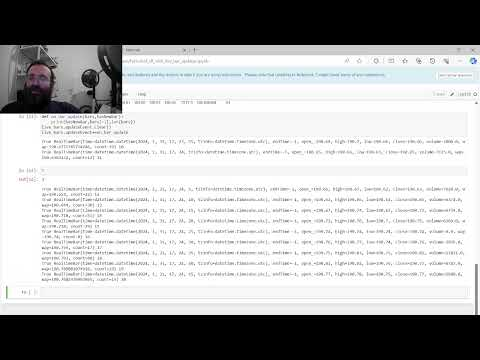

In [225]:
YouTubeVideo('S6sfUmF_iOQ', width=800, height=300)

* Historical Tick Data
- Annoyingly it rounds to nearest second

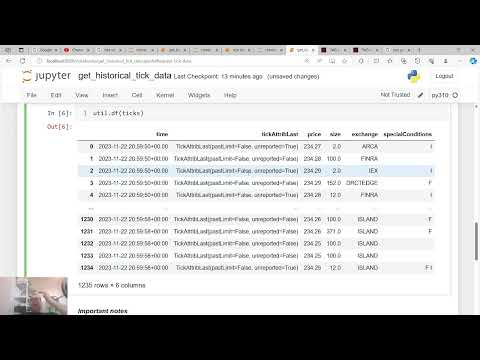

In [226]:
YouTubeVideo('fyvydmbp9CU', width=800, height=300)

* Video on Tick-By-Tick Data + How to save all the ticks

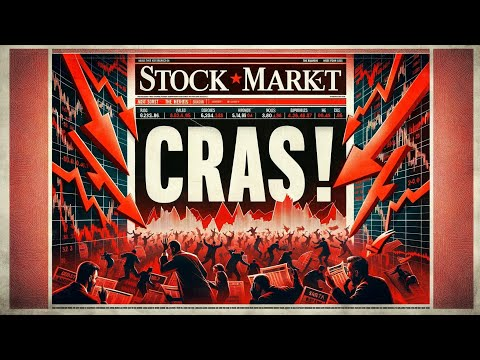

In [227]:
YouTubeVideo('b7FTwM7ezyo', width=800, height=300)

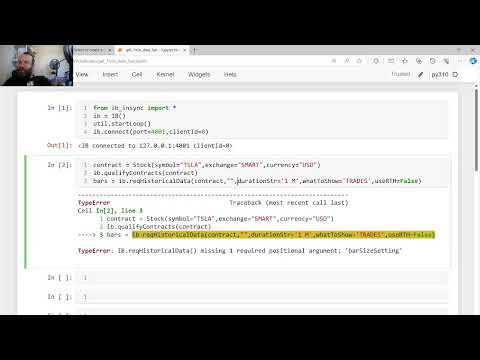

In [228]:
YouTubeVideo('JOeIFg9NVPo', width=800, height=300)

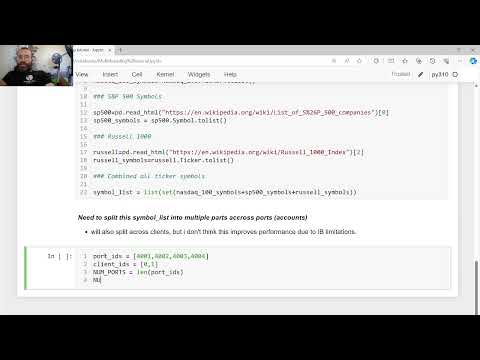

In [229]:
YouTubeVideo('2iT-og-R_lE', width=800, height=300)

* Get bar data (at end I speak about getting historical 5 second bars for a long range of dates)

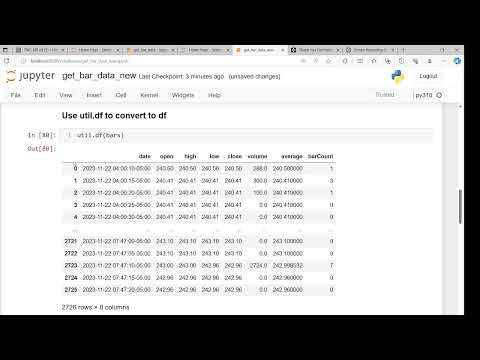

In [230]:
YouTubeVideo('p9_zsA5y8Vs', width=800, height=300)

* Get historical crypto data

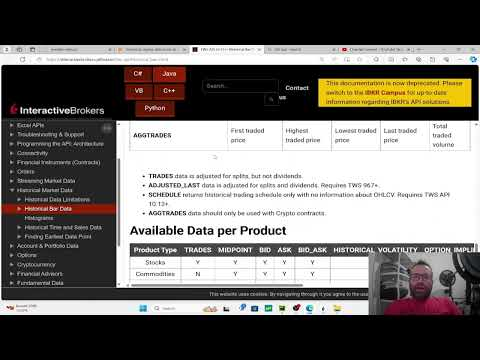

In [231]:
YouTubeVideo('MWMQ8DponmY', width=800, height=300)

* Get Greeks + Implied Volatility

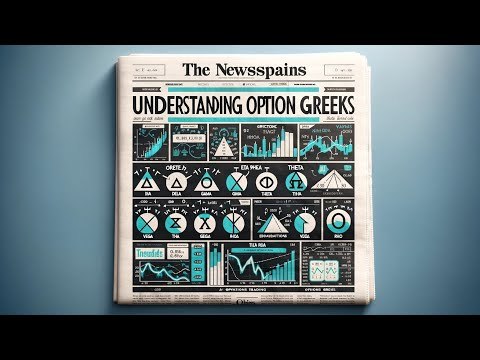

In [232]:
YouTubeVideo('FKJNHy1HHDQ', width=800, height=300)

### What is inside ib_insync package
* So much we didn't cover!

In [233]:
import ib_insync
print(ib_insync.__all__)


['Event', 'util', 'Client', 'Bag', 'Bond', 'CFD', 'ComboLeg', 'Commodity', 'ContFuture', 'Contract', 'ContractDescription', 'ContractDetails', 'Crypto', 'DeltaNeutralContract', 'Forex', 'Future', 'FuturesOption', 'Index', 'MutualFund', 'Option', 'ScanData', 'Stock', 'TagValue', 'Warrant', 'FlexError', 'FlexReport', 'IB', 'IBC', 'Watchdog', 'AccountValue', 'BarData', 'BarDataList', 'CommissionReport', 'ConnectionStats', 'DOMLevel', 'DepthMktDataDescription', 'Dividends', 'Execution', 'ExecutionFilter', 'FamilyCode', 'Fill', 'FundamentalRatios', 'HistogramData', 'HistoricalNews', 'HistoricalTick', 'HistoricalTickBidAsk', 'HistoricalTickLast', 'HistoricalSchedule', 'HistoricalSession', 'MktDepthData', 'NewsArticle', 'NewsBulletin', 'NewsProvider', 'NewsTick', 'OptionChain', 'OptionComputation', 'PnL', 'PnLSingle', 'PortfolioItem', 'Position', 'PriceIncrement', 'RealTimeBar', 'RealTimeBarList', 'ScanDataList', 'ScannerSubscription', 'SmartComponent', 'SoftDollarTier', 'TickAttrib', 'TickAt

### Logging

In [234]:
util.logToConsole(logging.DEBUG)


2024-05-29 17:28:51,730 ib_async.client DEBUG <<< 50,3,5179,1717018125,175.50,175.50,175.50,175.50,0,175.5,0
2024-05-29 17:28:56,722 ib_async.client DEBUG <<< 50,3,5179,1717018130,175.53,175.53,175.53,175.53,1000,175.53,1


In [237]:
ib.placeOrder(stock,LimitOrder("BUY",100,150))

2024-05-29 17:29:26,121 ib_async.client DEBUG >>> 3,5184,76792991,TSLA,STK,,0.0,,,SMART,NASDAQ,USD,TSLA,NMS,,,BUY,100,LMT,150,,,,,O,0,,1,0,0,0,0,0,0,0,,0.0,,,,,,,,0,,-1,0,,,0,,,0,0,,0,,,,,,0,,,,,0,,,,,,,,,,,0,,,0,0,,,0,,0,0,0,0,,,,,,,0,,,,,,,,,0,0,0,0,,,0,,
2024-05-29 17:29:26,122 ib_async.ib INFO placeOrder: New order Trade(contract=Stock(conId=76792991, symbol='TSLA', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='TSLA', tradingClass='NMS'), order=LimitOrder(orderId=5184, action='BUY', totalQuantity=100, lmtPrice=150), orderStatus=OrderStatus(orderId=5184, status='PendingSubmit', filled=0.0, remaining=0.0, avgFillPrice=0.0, permId=0, parentId=0, lastFillPrice=0.0, clientId=0, whyHeld='', mktCapPrice=0.0), fills=[], log=[TradeLogEntry(time=datetime.datetime(2024, 5, 29, 21, 29, 26, 122049, tzinfo=datetime.timezone.utc), status='PendingSubmit', message='', errorCode=0)], advancedError='')


Trade(contract=Stock(conId=76792991, symbol='TSLA', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='TSLA', tradingClass='NMS'), order=LimitOrder(orderId=5184, action='BUY', totalQuantity=100, lmtPrice=150), orderStatus=OrderStatus(orderId=5184, status='PendingSubmit', filled=0.0, remaining=0.0, avgFillPrice=0.0, permId=0, parentId=0, lastFillPrice=0.0, clientId=0, whyHeld='', mktCapPrice=0.0), fills=[], log=[TradeLogEntry(time=datetime.datetime(2024, 5, 29, 21, 29, 26, 122049, tzinfo=datetime.timezone.utc), status='PendingSubmit', message='', errorCode=0)], advancedError='')

2024-05-29 17:29:26,293 ib_async.client DEBUG <<< 5,5184,76792991,TSLA,STK,,0,?,,SMART,USD,TSLA,NMS,BUY,100,LMT,150.0,0.0,DAY,,DU7351505,,0,,0,1398246951,0,0,0,,1398246951.0/DU7351505/100,,,,,,,,,,0,,-1,0,,,,,,2147483647,0,0,0,,3,0,0,,0,0,,0,None,,0,,,,?,0,0,,0,0,,,,,,0,0,0,2147483647,2147483647,,,0,,IB,0,0,,0,0,PreSubmitted,1.7976931348623157E308,1.7976931348623157E308,1.7976931348623157E308,1.7976931348623157E308,1.7976931348623157E308,1.7976931348623157E308,1.7976931348623157E308,1.7976931348623157E308,1.7976931348623157E308,,,,,,0,0,0,None,1.7976931348623157E308,151.0,1.7976931348623157E308,1.7976931348623157E308,1.7976931348623157E308,1.7976931348623157E308,0,,,,0,1,0,0,0,,,0,,,,,
2024-05-29 17:29:26,294 ib_async.client DEBUG <<< 3,5184,PreSubmitted,0,100,0,1398246951,0,0,0,,0
2024-05-29 17:29:26,295 ib_async.wrapper INFO orderStatus: Trade(contract=Stock(conId=76792991, symbol='TSLA', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='TSLA', tradingClass='NM

### Disconnecting

In [238]:
ib.disconnect()

2024-05-29 17:29:38,565 ib_async.ib INFO Disconnecting from 127.0.0.1:4004, 12.8 kB sent in 177 messages, 1.34 MB received in 6854 messages, session time 3.88 ks.
2024-05-29 17:29:38,566 ib_async.client INFO Disconnecting
2024-05-29 17:29:38,574 ib_async.client INFO Disconnected.


### A few notes on clientId and masterClientId

* You can only see phone orders with clientId=0
* masterClientId sees all clients except phone unles it is also clientId=0

In [239]:
from ib_async import *
util.startLoop()
ib_0 = IB()
ib_0.connect(port=4004,clientId=0)

2024-05-29 17:31:12,443 ib_async.client INFO Connecting to 127.0.0.1:4004 with clientId 0...
2024-05-29 17:31:12,445 ib_async.client INFO Connected
2024-05-29 17:31:12,448 ib_async.client DEBUG <<< 176,20240529 17:31:11 EST
2024-05-29 17:31:12,448 ib_async.client DEBUG >>> 71,2,0,
2024-05-29 17:31:12,449 ib_async.client INFO Logged on to server version 176
2024-05-29 17:31:12,450 ib_async.client DEBUG <<< 5,5184,76792991,TSLA,STK,,0,?,,SMART,USD,TSLA,NMS,BUY,100,LMT,150.0,0.0,DAY,,DU7351505,,0,,0,1398246951,0,0,0,,1398246951.0/DU7351505/100,,,,,,,,,,0,,-1,0,,,,,,2147483647,0,0,0,,3,0,0,,0,0,,0,None,,0,,,,?,0,0,,0,0,,,,,,0,0,0,2147483647,2147483647,,,0,,IB,0,0,,0,0,PreSubmitted,1.7976931348623157E308,1.7976931348623157E308,1.7976931348623157E308,1.7976931348623157E308,1.7976931348623157E308,1.7976931348623157E308,1.7976931348623157E308,1.7976931348623157E308,1.7976931348623157E308,,,,,,0,0,0,None,1.7976931348623157E308,151.0,1.7976931348623157E308,1.7976931348623157E308,1.79769313486231

2024-05-29 17:31:12,458 ib_async.client DEBUG <<< 53,1
2024-05-29 17:31:12,459 ib_async.client DEBUG <<< 15,1,DU7351505
2024-05-29 17:31:12,459 ib_async.client DEBUG <<< 9,1,5185
2024-05-29 17:31:12,460 ib_async.client DEBUG <<< 4,2,-1,2104,Market data farm connection is OK:usopt,
2024-05-29 17:31:12,460 ib_async.wrapper INFO Warning 2104, reqId -1: Market data farm connection is OK:usopt
2024-05-29 17:31:12,460 ib_async.client DEBUG <<< 4,2,-1,2104,Market data farm connection is OK:usfarm,
2024-05-29 17:31:12,461 ib_async.wrapper INFO Warning 2104, reqId -1: Market data farm connection is OK:usfarm
2024-05-29 17:31:12,461 ib_async.client DEBUG <<< 4,2,-1,2106,HMDS data farm connection is OK:ushmds,
2024-05-29 17:31:12,462 ib_async.wrapper INFO Warning 2106, reqId -1: HMDS data farm connection is OK:ushmds
2024-05-29 17:31:12,462 ib_async.client DEBUG <<< 4,2,-1,2158,Sec-def data farm connection is OK:secdefnj,
2024-05-29 17:31:12,463 ib_async.wrapper INFO Warning 2158, reqId -1: Sec-d

2024-05-29 17:31:12,671 ib_async.client DEBUG <<< 101,696450827,TSLA,OPT,20240531,170,C,100,SMART,USD,TSLA  240531C00170000,TSLA,BUY,3,LMT,9.0,0.0,DAY,,DU7351505,,0,,1736022441,0,0,0,,,,,,,,0,,,0,,-1,,,,,,2147483647,0,0,,3,0,,0,None,,0,0,0,,0,0,,,,0,0,0,2147483647,2147483647,,,,IB,0,0,,0,Cancelled,0,0,0,1.7976931348623157E308,1.7976931348623157E308,0,1,0,,0,2147483647,0,Not an insider or substantial shareholder,0,0,0,20240529 14:56:05 US/Eastern,Cancelled by System:
We cannot accept an order at the limit price you selected. Please submit your order using a limit price that <br>is closer to the current market price of 7.65.  Alternatively, you can convert your order to an Algorithmic <br>Order (IBALGO).,,,,,
2024-05-29 17:31:12,671 ib_async.client DEBUG <<< 101,696450827,TSLA,OPT,20240531,170,C,100,SMART,USD,TSLA  240531C00170000,TSLA,BUY,0,LMT,8.0,0.0,DAY,,DU7351505,,0,,1736022440,0,0,0,,,,,,,,0,,,0,,-1,,,,,,2147483647,0,0,,3,0,,0,None,,0,0,0,,0,0,,,,0,0,0,2147483647,2147483647,,,,IB,0

2024-05-29 17:31:12,789 ib_async.client DEBUG <<< 6,2,EquityWithLoanValue-C,0.00,USD,DU7351505
2024-05-29 17:31:12,789 ib_async.client DEBUG <<< 6,2,EquityWithLoanValue-S,974450.63,USD,DU7351505
2024-05-29 17:31:12,791 ib_async.client DEBUG <<< 6,2,ExcessLiquidity,928700.59,USD,DU7351505
2024-05-29 17:31:12,791 ib_async.client DEBUG <<< 6,2,ExcessLiquidity-C,0.00,USD,DU7351505
2024-05-29 17:31:12,792 ib_async.client DEBUG <<< 6,2,ExcessLiquidity-S,928700.59,USD,DU7351505
2024-05-29 17:31:12,792 ib_async.client DEBUG <<< 6,2,ExchangeRate,1.00,BASE,DU7351505
2024-05-29 17:31:12,793 ib_async.client DEBUG <<< 6,2,ExchangeRate,0.2697179,ILS,DU7351505
2024-05-29 17:31:12,793 ib_async.client DEBUG <<< 6,2,ExchangeRate,1.00,USD,DU7351505
2024-05-29 17:31:12,793 ib_async.client DEBUG <<< 6,2,FullAvailableFunds,923750.15,USD,DU7351505
2024-05-29 17:31:12,794 ib_async.client DEBUG <<< 6,2,FullAvailableFunds-C,0.00,USD,DU7351505
2024-05-29 17:31:12,794 ib_async.client DEBUG <<< 6,2,FullAvailableFu

2024-05-29 17:31:12,832 ib_async.client DEBUG <<< 6,2,PhysicalCertificateValue-S,0.00,USD,DU7351505
2024-05-29 17:31:12,834 ib_async.client DEBUG <<< 6,2,PostExpirationExcess,879382.88,USD,DU7351505
2024-05-29 17:31:12,834 ib_async.client DEBUG <<< 6,2,PostExpirationExcess-C,0.00,USD,DU7351505
2024-05-29 17:31:12,834 ib_async.client DEBUG <<< 6,2,PostExpirationExcess-S,879382.88,USD,DU7351505
2024-05-29 17:31:12,835 ib_async.client DEBUG <<< 6,2,PostExpirationMargin,98367.75,USD,DU7351505
2024-05-29 17:31:12,835 ib_async.client DEBUG <<< 6,2,PostExpirationMargin-C,0.00,USD,DU7351505
2024-05-29 17:31:12,835 ib_async.client DEBUG <<< 6,2,PostExpirationMargin-S,98367.75,USD,DU7351505
2024-05-29 17:31:12,836 ib_async.client DEBUG <<< 6,2,PreviousDayEquityWithLoanValue,974478.06,USD,DU7351505
2024-05-29 17:31:12,836 ib_async.client DEBUG <<< 6,2,PreviousDayEquityWithLoanValue-S,974478.06,USD,DU7351505
2024-05-29 17:31:12,836 ib_async.client DEBUG <<< 6,2,RealCurrency,BASE,BASE,DU7351505
202

2024-05-29 17:31:12,889 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,EquityWithLoanValue,974450.63,USD
2024-05-29 17:31:12,889 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,EquityWithLoanValue-C,0.00,USD
2024-05-29 17:31:12,890 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,EquityWithLoanValue-S,974450.63,USD
2024-05-29 17:31:12,890 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,ExcessLiquidity,928700.59,USD
2024-05-29 17:31:12,891 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,ExcessLiquidity-C,0.00,USD
2024-05-29 17:31:12,892 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,ExcessLiquidity-S,928700.59,USD
2024-05-29 17:31:12,893 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,FullAvailableFunds,923750.15,USD
2024-05-29 17:31:12,894 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,FullAvailableFunds-C,0.00,USD
2024-05-29 17:31:12,894 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,FullAvailableFunds-S,923750.15,USD
2024-05-29 17:31:12,895 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,Fu

2024-05-29 17:31:12,937 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,Currency,ILS,ILS
2024-05-29 17:31:12,938 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,CashBalance,724560.00,ILS
2024-05-29 17:31:12,938 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,TotalCashBalance,724560.00,ILS
2024-05-29 17:31:12,938 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,AccruedCash,0.00,ILS
2024-05-29 17:31:12,939 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,StockMarketValue,0.00,ILS
2024-05-29 17:31:12,939 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,OptionMarketValue,0.00,ILS
2024-05-29 17:31:12,939 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,FutureOptionValue,0.00,ILS
2024-05-29 17:31:12,940 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,FuturesPNL,0.00,ILS
2024-05-29 17:31:12,940 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,NetLiquidationByCurrency,724560.00,ILS
2024-05-29 17:31:12,941 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,UnrealizedPnL,0.00,ILS
2024-05-29 17:31:12,941 ib_async.

2024-05-29 17:31:12,980 ib_async.wrapper INFO execDetails Execution(execId='00020056.6656e02e.01.01', time=datetime.datetime(2024, 5, 29, 19, 56, 59, tzinfo=datetime.timezone.utc), acctNumber='DU7351505', exchange='BOX', side='BOT', shares=3.0, price=7.0, permId=1736022439, clientId=0, orderId=5023, liquidation=0, cumQty=3.0, avgPrice=7.0, orderRef='', evRule='', evMultiplier=0.0, modelCode='', lastLiquidity=2, pendingPriceRevision=False)
2024-05-29 17:31:12,981 ib_async.client DEBUG <<< 11,5186,5173,76792991,TSLA,STK,,0.0,,,ARCA,USD,TSLA,NMS,00025b46.665719c0.01.01,20240529 17:08:16 US/Eastern,DU7351505,ARCA,BOT,1,175.40,1398246946,0,0,1,175.40,,,,,2
2024-05-29 17:31:12,981 ib_async.wrapper INFO execDetails Execution(execId='00025b46.665719c0.01.01', time=datetime.datetime(2024, 5, 29, 21, 8, 16, tzinfo=datetime.timezone.utc), acctNumber='DU7351505', exchange='ARCA', side='BOT', shares=1.0, price=175.4, permId=1398246946, clientId=0, orderId=5173, liquidation=0, cumQty=1.0, avgPrice=1

<IB connected to 127.0.0.1:4004 clientId=0>

In [240]:
ib_0.openOrders()

[Order(orderId=5184, permId=1398246951, action='BUY', totalQuantity=100.0, orderType='LMT', lmtPrice=150.0, auxPrice=0.0, tif='DAY', ocaType=3, displaySize=2147483647, trailStopPrice=151.0, openClose='', volatilityType=0, deltaNeutralOrderType='None', referencePriceType=0, account='DU7351505', clearingIntent='IB', adjustedOrderType='None', cashQty=0.0, dontUseAutoPriceForHedge=True),
 Order(orderId=5183, permId=1398246950, action='BUY', totalQuantity=100.0, orderType='LMT', lmtPrice=150.0, auxPrice=0.0, tif='DAY', ocaType=3, displaySize=2147483647, trailStopPrice=151.0, openClose='', volatilityType=0, deltaNeutralOrderType='None', referencePriceType=0, account='DU7351505', clearingIntent='IB', adjustedOrderType='None', cashQty=0.0, dontUseAutoPriceForHedge=True),
 Order(orderId=5171, permId=1398246944, action='BUY', totalQuantity=1.0, orderType='LMT', lmtPrice=180.0, auxPrice=0.0, tif='DAY', ocaType=3, displaySize=2147483647, trailStopPrice=181.0, openClose='', volatilityType=0, deltaN

#### ClientId  = 4 so not master and doesn't see other clientId orders

In [241]:
from ib_async import *
util.startLoop()
ib_4 = IB()
ib_4.connect(port=4004,clientId=4)

2024-05-29 17:31:43,392 ib_async.client INFO Connecting to 127.0.0.1:4004 with clientId 4...
2024-05-29 17:31:43,395 ib_async.client INFO Connected
2024-05-29 17:31:43,397 ib_async.client DEBUG <<< 176,20240529 17:31:41 EST
2024-05-29 17:31:43,398 ib_async.client DEBUG >>> 71,2,4,
2024-05-29 17:31:43,399 ib_async.client INFO Logged on to server version 176
2024-05-29 17:31:43,399 ib_async.client DEBUG <<< 15,1,DU7351505
2024-05-29 17:31:43,400 ib_async.client DEBUG <<< 9,1,4
2024-05-29 17:31:43,400 ib_async.client DEBUG <<< 4,2,-1,2104,Market data farm connection is OK:usopt,
2024-05-29 17:31:43,401 ib_async.wrapper INFO Warning 2104, reqId -1: Market data farm connection is OK:usopt
2024-05-29 17:31:43,401 ib_async.client DEBUG <<< 4,2,-1,2104,Market data farm connection is OK:usfarm,
2024-05-29 17:31:43,402 ib_async.wrapper INFO Warning 2104, reqId -1: Market data farm connection is OK:usfarm
2024-05-29 17:31:43,403 ib_async.client DEBUG <<< 4,2,-1,2106,HMDS data farm connection is O

2024-05-29 17:31:43,617 ib_async.client DEBUG <<< 101,76792991,TSLA,STK,,0,?,,SMART,USD,TSLA,NMS,BUY,0,LMT,180.0,0.0,DAY,,DU7351505,O,0,,1398246947,1,0,0,,,,,,,,,,,0,,-1,,,,,,2147483647,0,0,,3,0,,0,None,,0,0,0,,0,0,,,,0,0,0,2147483647,2147483647,,,,IB,0,0,,0,Filled,0,0,0,181.0,1.7976931348623157E308,0,1,0,,100,2147483647,0,Not an insider or substantial shareholder,0,0,9223372036854775807,20240529 17:08:39 US/Eastern,Filled Size: 100,,100,0.02,,
2024-05-29 17:31:43,617 ib_async.client DEBUG <<< 101,76792991,TSLA,STK,,0,?,,SMART,USD,TSLA,NMS,BUY,0,LMT,180.0,0.0,DAY,,DU7351505,O,0,,1398246946,1,0,0,,,,,,,,,,,0,,-1,,,,,,2147483647,0,0,,3,0,,0,None,,0,0,0,,0,0,,,,0,0,0,2147483647,2147483647,,,,IB,0,0,,0,Filled,0,0,0,181.0,1.7976931348623157E308,0,1,0,,1,2147483647,0,Not an insider or substantial shareholder,0,0,9223372036854775807,20240529 17:08:16 US/Eastern,Filled Size: 1,,100,0.02,,
2024-05-29 17:31:43,620 ib_async.client DEBUG <<< 101,702566587,TSLA,OPT,20240628,180,P,100,SMART,USD,TSLA

2024-05-29 17:31:43,752 ib_async.client DEBUG <<< 6,2,FxCashBalance,0.00,BASE,DU7351505
2024-05-29 17:31:43,753 ib_async.client DEBUG <<< 6,2,FxCashBalance,0.00,ILS,DU7351505
2024-05-29 17:31:43,753 ib_async.client DEBUG <<< 6,2,FxCashBalance,0.00,USD,DU7351505
2024-05-29 17:31:43,753 ib_async.client DEBUG <<< 6,2,GrossPositionValue,95189.83,USD,DU7351505
2024-05-29 17:31:43,753 ib_async.client DEBUG <<< 6,2,GrossPositionValue-S,95189.83,USD,DU7351505
2024-05-29 17:31:43,754 ib_async.client DEBUG <<< 6,2,Guarantee,0.00,USD,DU7351505
2024-05-29 17:31:43,754 ib_async.client DEBUG <<< 6,2,Guarantee-C,0.00,USD,DU7351505
2024-05-29 17:31:43,754 ib_async.client DEBUG <<< 6,2,Guarantee-S,0.00,USD,DU7351505
2024-05-29 17:31:43,755 ib_async.client DEBUG <<< 6,2,IndianStockHaircut,0.00,USD,DU7351505
2024-05-29 17:31:43,755 ib_async.client DEBUG <<< 6,2,IndianStockHaircut-C,0.00,USD,DU7351505
2024-05-29 17:31:43,755 ib_async.client DEBUG <<< 6,2,IndianStockHaircut-S,0.00,USD,DU7351505
2024-05-29 

2024-05-29 17:31:43,797 ib_async.client DEBUG <<< 6,2,TBondValue,0.00,BASE,DU7351505
2024-05-29 17:31:43,797 ib_async.client DEBUG <<< 6,2,TBondValue,0.00,ILS,DU7351505
2024-05-29 17:31:43,798 ib_async.client DEBUG <<< 6,2,TBondValue,0.00,USD,DU7351505
2024-05-29 17:31:43,798 ib_async.client DEBUG <<< 6,2,TotalCashBalance,885197.0378,BASE,DU7351505
2024-05-29 17:31:43,799 ib_async.client DEBUG <<< 6,2,TotalCashBalance,724560.00,ILS,DU7351505
2024-05-29 17:31:43,799 ib_async.client DEBUG <<< 6,2,TotalCashBalance,689703.8989,USD,DU7351505
2024-05-29 17:31:43,800 ib_async.client DEBUG <<< 6,2,TotalCashValue,885197.04,USD,DU7351505
2024-05-29 17:31:43,800 ib_async.client DEBUG <<< 6,2,TotalCashValue-C,0.00,USD,DU7351505
2024-05-29 17:31:43,800 ib_async.client DEBUG <<< 6,2,TotalCashValue-S,885197.04,USD,DU7351505
2024-05-29 17:31:43,801 ib_async.client DEBUG <<< 6,2,TotalDebitCardPendingCharges,0.00,USD,DU7351505
2024-05-29 17:31:43,802 ib_async.client DEBUG <<< 6,2,TotalDebitCardPendingCh

2024-05-29 17:31:43,841 ib_async.client DEBUG <<< 73,1,4,DU7351505,,InitMarginReq-S,50700.48,USD
2024-05-29 17:31:43,841 ib_async.client DEBUG <<< 73,1,4,DU7351505,,Leverage-S,0.10,
2024-05-29 17:31:43,841 ib_async.client DEBUG <<< 73,1,4,DU7351505,,LookAheadAvailableFunds,923750.15,USD
2024-05-29 17:31:43,842 ib_async.client DEBUG <<< 73,1,4,DU7351505,,LookAheadAvailableFunds-C,0.00,USD
2024-05-29 17:31:43,844 ib_async.client DEBUG <<< 73,1,4,DU7351505,,LookAheadAvailableFunds-S,923750.15,USD
2024-05-29 17:31:43,844 ib_async.client DEBUG <<< 73,1,4,DU7351505,,LookAheadExcessLiquidity,928700.59,USD
2024-05-29 17:31:43,844 ib_async.client DEBUG <<< 73,1,4,DU7351505,,LookAheadExcessLiquidity-C,0.00,USD
2024-05-29 17:31:43,845 ib_async.client DEBUG <<< 73,1,4,DU7351505,,LookAheadExcessLiquidity-S,928700.59,USD
2024-05-29 17:31:43,845 ib_async.client DEBUG <<< 73,1,4,DU7351505,,LookAheadInitMarginReq,50700.48,USD
2024-05-29 17:31:43,846 ib_async.client DEBUG <<< 73,1,4,DU7351505,,LookAhead

2024-05-29 17:31:43,884 ib_async.client DEBUG <<< 73,1,4,DU7351505,,FuturesPNL,0.00,USD
2024-05-29 17:31:43,884 ib_async.client DEBUG <<< 73,1,4,DU7351505,,NetLiquidationByCurrency,783777.0445,USD
2024-05-29 17:31:43,885 ib_async.client DEBUG <<< 73,1,4,DU7351505,,UnrealizedPnL,-1551.76,USD
2024-05-29 17:31:43,885 ib_async.client DEBUG <<< 73,1,4,DU7351505,,RealizedPnL,0.00,USD
2024-05-29 17:31:43,885 ib_async.client DEBUG <<< 73,1,4,DU7351505,,ExchangeRate,1.00,USD
2024-05-29 17:31:43,886 ib_async.client DEBUG <<< 73,1,4,DU7351505,,FundValue,0.00,USD
2024-05-29 17:31:43,887 ib_async.client DEBUG <<< 73,1,4,DU7351505,,NetDividend,0.00,USD
2024-05-29 17:31:43,887 ib_async.client DEBUG <<< 73,1,4,DU7351505,,MutualFundValue,0.00,USD
2024-05-29 17:31:43,888 ib_async.client DEBUG <<< 73,1,4,DU7351505,,MoneyMarketFundValue,0.00,USD
2024-05-29 17:31:43,888 ib_async.client DEBUG <<< 73,1,4,DU7351505,,CorporateBondValue,0.00,USD
2024-05-29 17:31:43,888 ib_async.client DEBUG <<< 73,1,4,DU7351505

2024-05-29 17:31:43,916 ib_async.wrapper INFO commissionReport: CommissionReport(execId='00025b46.665719c0.01.01', commission=1.0, currency='USD', realizedPNL=0.0, yield_=0.0, yieldRedemptionDate=0)
2024-05-29 17:31:43,917 ib_async.client DEBUG <<< 59,1,00025b46.665719c1.01.01,1.0,USD,1.7976931348623157E308,1.7976931348623157E308,
2024-05-29 17:31:43,918 ib_async.wrapper INFO commissionReport: CommissionReport(execId='00025b46.665719c1.01.01', commission=1.0, currency='USD', realizedPNL=0.0, yield_=0.0, yieldRedemptionDate=0)
2024-05-29 17:31:43,919 ib_async.client DEBUG <<< 59,1,00025b46.665719c3.01.01,1.0,USD,1.7976931348623157E308,1.7976931348623157E308,
2024-05-29 17:31:43,919 ib_async.wrapper INFO commissionReport: CommissionReport(execId='00025b46.665719c3.01.01', commission=1.0, currency='USD', realizedPNL=0.0, yield_=0.0, yieldRedemptionDate=0)
2024-05-29 17:31:43,920 ib_async.client DEBUG <<< 55,1,5
2024-05-29 17:31:43,920 ib_async.ib INFO Synchronization complete


<IB connected to 127.0.0.1:4004 clientId=4>

In [242]:
ib_4.openOrders()

[]

2024-05-29 17:32:09,390 ib_async.client DEBUG <<< 6,2,DayTradingStatus-S,20240520::true:980397.87::false,,DU7351505
2024-05-29 17:32:09,391 ib_async.client DEBUG <<< 6,2,Cushion,0.948368,,DU7351505
2024-05-29 17:32:09,391 ib_async.client DEBUG <<< 8,1,17:32
2024-05-29 17:32:09,392 ib_async.client DEBUG <<< 6,2,DayTradingStatus-S,20240520::true:980397.87::false,,DU7351505
2024-05-29 17:32:09,393 ib_async.client DEBUG <<< 6,2,Cushion,0.948368,,DU7351505
2024-05-29 17:32:09,394 ib_async.client DEBUG <<< 8,1,17:32
2024-05-29 17:32:09,394 ib_async.client DEBUG <<< 8,1,17:32
2024-05-29 17:32:09,395 ib_async.client DEBUG <<< 73,1,4,DU7351505,,Cushion,0.948368,
2024-05-29 17:32:09,395 ib_async.client DEBUG <<< 73,1,4,DU7351505,,DayTradingStatus-S,20240520::true:980397.87::false,
2024-05-29 17:32:09,396 ib_async.client DEBUG <<< 8,1,17:32
2024-05-29 17:32:09,396 ib_async.client DEBUG <<< 6,2,EquityWithLoanValue-S,974461.63,USD,DU7351505
2024-05-29 17:32:09,397 ib_async.client DEBUG <<< 6,2,NetL

2024-05-29 17:32:09,436 ib_async.client DEBUG <<< 73,1,4,DU7351505,,PostExpirationMargin,98362.15,USD
2024-05-29 17:32:09,437 ib_async.client DEBUG <<< 73,1,4,DU7351505,,PostExpirationMargin-S,98362.15,USD
2024-05-29 17:32:09,437 ib_async.client DEBUG <<< 73,1,4,DU7351505,,RegTEquity,975526.86,USD
2024-05-29 17:32:09,438 ib_async.client DEBUG <<< 73,1,4,DU7351505,,RegTEquity-S,975526.86,USD
2024-05-29 17:32:09,438 ib_async.client DEBUG <<< 73,1,4,DU7351505,,RegTMargin,45715.15,USD
2024-05-29 17:32:09,440 ib_async.client DEBUG <<< 73,1,4,DU7351505,,RegTMargin-S,45715.15,USD
2024-05-29 17:32:09,441 ib_async.client DEBUG <<< 73,1,4,DU7351505,,TotalCashValue,885213.25,USD
2024-05-29 17:32:09,441 ib_async.client DEBUG <<< 73,1,4,DU7351505,,TotalCashValue-S,885213.25,USD
2024-05-29 17:32:09,442 ib_async.client DEBUG <<< 8,1,17:32
2024-05-29 17:32:09,442 ib_async.client DEBUG <<< 6,2,StockMarketValue,91430.29,USD,DU7351505
2024-05-29 17:32:09,442 ib_async.client DEBUG <<< 6,2,NetLiquidationBy

2024-05-29 17:32:09,492 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,LookAheadMaintMarginReq-S,45742.45,USD
2024-05-29 17:32:09,492 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,MaintMarginReq,45742.45,USD
2024-05-29 17:32:09,493 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,MaintMarginReq-S,45742.45,USD
2024-05-29 17:32:09,493 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,NetLiquidation,979281.19,USD
2024-05-29 17:32:09,494 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,NetLiquidation-S,979281.19,USD
2024-05-29 17:32:09,494 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,PostExpirationExcess,879393.49,USD
2024-05-29 17:32:09,495 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,PostExpirationExcess-S,879393.49,USD
2024-05-29 17:32:09,495 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,PostExpirationMargin,98362.15,USD
2024-05-29 17:32:09,496 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,PostExpirationMargin-S,98362.15,USD
2024-05-29 17:32:09,497 ib_async.client DEBUG <<< 73,1,5185,DU

2024-05-29 17:32:09,552 ib_async.client DEBUG <<< 8,1,17:32
2024-05-29 17:32:09,553 ib_async.client DEBUG <<< 8,1,17:32
2024-05-29 17:32:09,553 ib_async.client DEBUG <<< 6,2,CashBalance,885213.2491,BASE,DU7351505
2024-05-29 17:32:09,554 ib_async.client DEBUG <<< 6,2,TotalCashBalance,885213.2491,BASE,DU7351505
2024-05-29 17:32:09,555 ib_async.client DEBUG <<< 6,2,StockMarketValue,91430.29,BASE,DU7351505
2024-05-29 17:32:09,557 ib_async.client DEBUG <<< 6,2,NetLiquidationByCurrency,979281.1875,BASE,DU7351505
2024-05-29 17:32:09,557 ib_async.client DEBUG <<< 6,2,UnrealizedPnL,-1556.96,BASE,DU7351505
2024-05-29 17:32:09,558 ib_async.client DEBUG <<< 8,1,17:32
2024-05-29 17:32:09,559 ib_async.client DEBUG <<< 73,1,4,DU7351505,,AccountOrGroup,DU7351505,BASE
2024-05-29 17:32:09,560 ib_async.client DEBUG <<< 73,1,4,DU7351505,,AccountOrGroup,DU7351505,USD
2024-05-29 17:32:09,560 ib_async.client DEBUG <<< 73,1,4,DU7351505,,AccruedCash,-1116.68,BASE
2024-05-29 17:32:09,561 ib_async.client DEBUG <

### But master sees everything!

In [243]:
from ib_async import *
util.startLoop()
ib_3 = IB()
ib_3.connect(port=4004,clientId=3)
ib_3.openOrders()

2024-05-29 17:32:17,262 ib_async.client INFO Connecting to 127.0.0.1:4004 with clientId 3...
2024-05-29 17:32:17,265 ib_async.client INFO Connected
2024-05-29 17:32:17,268 ib_async.client DEBUG <<< 176,20240529 17:32:15 EST
2024-05-29 17:32:17,268 ib_async.client DEBUG >>> 71,2,3,
2024-05-29 17:32:17,269 ib_async.client INFO Logged on to server version 176
2024-05-29 17:32:17,270 ib_async.client DEBUG <<< 5,5184,76792991,TSLA,STK,,0,?,,SMART,USD,TSLA,NMS,BUY,100,LMT,150.0,0.0,DAY,,DU7351505,,0,,0,1398246951,0,0,0,,1398246951.0/DU7351505/100,,,,,,,,,,0,,-1,0,,,,,,2147483647,0,0,0,,3,0,0,,0,0,,0,None,,0,,,,?,0,0,,0,0,,,,,,0,0,0,2147483647,2147483647,,,0,,IB,0,0,,0,0,PreSubmitted,1.7976931348623157E308,1.7976931348623157E308,1.7976931348623157E308,1.7976931348623157E308,1.7976931348623157E308,1.7976931348623157E308,1.7976931348623157E308,1.7976931348623157E308,1.7976931348623157E308,,,,,,0,0,0,None,1.7976931348623157E308,151.0,1.7976931348623157E308,1.7976931348623157E308,1.79769313486231

2024-05-29 17:32:17,280 ib_async.client DEBUG <<< 53,1
2024-05-29 17:32:17,280 ib_async.client DEBUG <<< 15,1,DU7351505
2024-05-29 17:32:17,281 ib_async.client DEBUG <<< 9,1,5185
2024-05-29 17:32:17,281 ib_async.client DEBUG <<< 4,2,-1,2104,Market data farm connection is OK:usopt,
2024-05-29 17:32:17,282 ib_async.wrapper INFO Warning 2104, reqId -1: Market data farm connection is OK:usopt
2024-05-29 17:32:17,282 ib_async.client DEBUG <<< 4,2,-1,2104,Market data farm connection is OK:usfarm,
2024-05-29 17:32:17,283 ib_async.wrapper INFO Warning 2104, reqId -1: Market data farm connection is OK:usfarm
2024-05-29 17:32:17,283 ib_async.client DEBUG <<< 4,2,-1,2106,HMDS data farm connection is OK:ushmds,
2024-05-29 17:32:17,284 ib_async.wrapper INFO Warning 2106, reqId -1: HMDS data farm connection is OK:ushmds
2024-05-29 17:32:17,284 ib_async.client DEBUG <<< 4,2,-1,2158,Sec-def data farm connection is OK:secdefnj,
2024-05-29 17:32:17,285 ib_async.wrapper INFO Warning 2158, reqId -1: Sec-d

2024-05-29 17:32:17,498 ib_async.client DEBUG <<< 101,76792991,TSLA,STK,,0,?,,SMART,USD,TSLA,NMS,BUY,0,LMT,180.0,0.0,DAY,,DU7351505,O,0,,1398246947,1,0,0,,,,,,,,,,,0,,-1,,,,,,2147483647,0,0,,3,0,,0,None,,0,0,0,,0,0,,,,0,0,0,2147483647,2147483647,,,,IB,0,0,,0,Filled,0,0,0,181.0,1.7976931348623157E308,0,1,0,,100,2147483647,0,Not an insider or substantial shareholder,0,0,9223372036854775807,20240529 17:08:39 US/Eastern,Filled Size: 100,,100,0.02,,
2024-05-29 17:32:17,499 ib_async.client DEBUG <<< 101,76792991,TSLA,STK,,0,?,,SMART,USD,TSLA,NMS,BUY,0,LMT,180.0,0.0,DAY,,DU7351505,O,0,,1398246946,1,0,0,,,,,,,,,,,0,,-1,,,,,,2147483647,0,0,,3,0,,0,None,,0,0,0,,0,0,,,,0,0,0,2147483647,2147483647,,,,IB,0,0,,0,Filled,0,0,0,181.0,1.7976931348623157E308,0,1,0,,1,2147483647,0,Not an insider or substantial shareholder,0,0,9223372036854775807,20240529 17:08:16 US/Eastern,Filled Size: 1,,100,0.02,,
2024-05-29 17:32:17,499 ib_async.client DEBUG <<< 101,702566587,TSLA,OPT,20240628,180,P,100,SMART,USD,TSLA

2024-05-29 17:32:17,631 ib_async.client DEBUG <<< 6,2,FxCashBalance,0.00,BASE,DU7351505
2024-05-29 17:32:17,631 ib_async.client DEBUG <<< 6,2,FxCashBalance,0.00,ILS,DU7351505
2024-05-29 17:32:17,631 ib_async.client DEBUG <<< 6,2,FxCashBalance,0.00,USD,DU7351505
2024-05-29 17:32:17,632 ib_async.client DEBUG <<< 6,2,GrossPositionValue,95184.62,USD,DU7351505
2024-05-29 17:32:17,632 ib_async.client DEBUG <<< 6,2,GrossPositionValue-S,95184.62,USD,DU7351505
2024-05-29 17:32:17,632 ib_async.client DEBUG <<< 6,2,Guarantee,0.00,USD,DU7351505
2024-05-29 17:32:17,633 ib_async.client DEBUG <<< 6,2,Guarantee-C,0.00,USD,DU7351505
2024-05-29 17:32:17,634 ib_async.client DEBUG <<< 6,2,Guarantee-S,0.00,USD,DU7351505
2024-05-29 17:32:17,634 ib_async.client DEBUG <<< 6,2,IndianStockHaircut,0.00,USD,DU7351505
2024-05-29 17:32:17,635 ib_async.client DEBUG <<< 6,2,IndianStockHaircut-C,0.00,USD,DU7351505
2024-05-29 17:32:17,635 ib_async.client DEBUG <<< 6,2,IndianStockHaircut-S,0.00,USD,DU7351505
2024-05-29 

2024-05-29 17:32:17,677 ib_async.client DEBUG <<< 6,2,TBondValue,0.00,BASE,DU7351505
2024-05-29 17:32:17,677 ib_async.client DEBUG <<< 6,2,TBondValue,0.00,ILS,DU7351505
2024-05-29 17:32:17,678 ib_async.client DEBUG <<< 6,2,TBondValue,0.00,USD,DU7351505
2024-05-29 17:32:17,678 ib_async.client DEBUG <<< 6,2,TotalCashBalance,885213.2491,BASE,DU7351505
2024-05-29 17:32:17,678 ib_async.client DEBUG <<< 6,2,TotalCashBalance,724560.00,ILS,DU7351505
2024-05-29 17:32:17,679 ib_async.client DEBUG <<< 6,2,TotalCashBalance,689703.8989,USD,DU7351505
2024-05-29 17:32:17,681 ib_async.client DEBUG <<< 6,2,TotalCashValue,885213.25,USD,DU7351505
2024-05-29 17:32:17,682 ib_async.client DEBUG <<< 6,2,TotalCashValue-C,0.00,USD,DU7351505
2024-05-29 17:32:17,682 ib_async.client DEBUG <<< 6,2,TotalCashValue-S,885213.25,USD,DU7351505
2024-05-29 17:32:17,682 ib_async.client DEBUG <<< 6,2,TotalDebitCardPendingCharges,0.00,USD,DU7351505
2024-05-29 17:32:17,682 ib_async.client DEBUG <<< 6,2,TotalDebitCardPendingCh

2024-05-29 17:32:17,720 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,InitMarginReq,50692.13,USD
2024-05-29 17:32:17,721 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,InitMarginReq-C,0.00,USD
2024-05-29 17:32:17,721 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,InitMarginReq-S,50692.13,USD
2024-05-29 17:32:17,722 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,Leverage-S,0.10,
2024-05-29 17:32:17,722 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,LookAheadAvailableFunds,923769.50,USD
2024-05-29 17:32:17,722 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,LookAheadAvailableFunds-C,0.00,USD
2024-05-29 17:32:17,723 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,LookAheadAvailableFunds-S,923769.50,USD
2024-05-29 17:32:17,723 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,LookAheadExcessLiquidity,928719.18,USD
2024-05-29 17:32:17,726 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,LookAheadExcessLiquidity-C,0.00,USD
2024-05-29 17:32:17,726 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,Look

2024-05-29 17:32:17,774 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,TotalCashBalance,689703.8989,USD
2024-05-29 17:32:17,774 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,AccruedCash,-1116.68,USD
2024-05-29 17:32:17,775 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,StockMarketValue,91430.29,USD
2024-05-29 17:32:17,775 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,OptionMarketValue,3754.33,USD
2024-05-29 17:32:17,775 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,FutureOptionValue,0.00,USD
2024-05-29 17:32:17,776 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,FuturesPNL,0.00,USD
2024-05-29 17:32:17,776 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,NetLiquidationByCurrency,783771.8373,USD
2024-05-29 17:32:17,777 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,UnrealizedPnL,-1556.96,USD
2024-05-29 17:32:17,778 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,RealizedPnL,0.00,USD
2024-05-29 17:32:17,778 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,ExchangeRate,1.00,USD
2024-05-29 17:

2024-05-29 17:32:17,804 ib_async.wrapper INFO commissionReport: CommissionReport(execId='00020056.6656d663.01.01', commission=2.09055, currency='USD', realizedPNL=0.0, yield_=0.0, yieldRedemptionDate=0)
2024-05-29 17:32:17,807 ib_async.client DEBUG <<< 59,1,00020056.6656e02e.01.01,2.09055,USD,1.7976931348623157E308,1.7976931348623157E308,
2024-05-29 17:32:17,807 ib_async.wrapper INFO commissionReport: CommissionReport(execId='00020056.6656e02e.01.01', commission=2.09055, currency='USD', realizedPNL=0.0, yield_=0.0, yieldRedemptionDate=0)
2024-05-29 17:32:17,808 ib_async.client DEBUG <<< 59,1,00025b46.665719c0.01.01,1.0,USD,1.7976931348623157E308,1.7976931348623157E308,
2024-05-29 17:32:17,808 ib_async.wrapper INFO commissionReport: CommissionReport(execId='00025b46.665719c0.01.01', commission=1.0, currency='USD', realizedPNL=0.0, yield_=0.0, yieldRedemptionDate=0)
2024-05-29 17:32:17,808 ib_async.client DEBUG <<< 59,1,00025b46.665719c1.01.01,1.0,USD,1.7976931348623157E308,1.79769313486

[Order(orderId=5184, permId=1398246951, action='BUY', totalQuantity=100.0, orderType='LMT', lmtPrice=150.0, auxPrice=0.0, tif='DAY', ocaType=3, displaySize=2147483647, trailStopPrice=151.0, openClose='', volatilityType=0, deltaNeutralOrderType='None', referencePriceType=0, account='DU7351505', clearingIntent='IB', adjustedOrderType='None', cashQty=0.0, dontUseAutoPriceForHedge=True),
 Order(orderId=5183, permId=1398246950, action='BUY', totalQuantity=100.0, orderType='LMT', lmtPrice=150.0, auxPrice=0.0, tif='DAY', ocaType=3, displaySize=2147483647, trailStopPrice=151.0, openClose='', volatilityType=0, deltaNeutralOrderType='None', referencePriceType=0, account='DU7351505', clearingIntent='IB', adjustedOrderType='None', cashQty=0.0, dontUseAutoPriceForHedge=True),
 Order(orderId=5171, permId=1398246944, action='BUY', totalQuantity=1.0, orderType='LMT', lmtPrice=180.0, auxPrice=0.0, tif='DAY', ocaType=3, displaySize=2147483647, trailStopPrice=181.0, openClose='', volatilityType=0, deltaN

2024-05-29 17:35:09,400 ib_async.client DEBUG <<< 6,2,DayTradingStatus-S,20240520::true:980368.40::false,,DU7351505
2024-05-29 17:35:09,401 ib_async.client DEBUG <<< 6,2,Cushion,0.948374,,DU7351505
2024-05-29 17:35:09,402 ib_async.client DEBUG <<< 8,1,17:35
2024-05-29 17:35:09,402 ib_async.client DEBUG <<< 8,1,17:35
2024-05-29 17:35:09,403 ib_async.client DEBUG <<< 6,2,DayTradingStatus-S,20240520::true:980368.40::false,,DU7351505
2024-05-29 17:35:09,403 ib_async.client DEBUG <<< 6,2,Cushion,0.948374,,DU7351505
2024-05-29 17:35:09,405 ib_async.client DEBUG <<< 8,1,17:35
2024-05-29 17:35:09,405 ib_async.client DEBUG <<< 8,1,17:35
2024-05-29 17:35:09,406 ib_async.client DEBUG <<< 73,1,4,DU7351505,,Cushion,0.948374,
2024-05-29 17:35:09,406 ib_async.client DEBUG <<< 73,1,4,DU7351505,,DayTradingStatus-S,20240520::true:980368.40::false,
2024-05-29 17:35:09,407 ib_async.client DEBUG <<< 8,1,17:35
2024-05-29 17:35:09,407 ib_async.client DEBUG <<< 6,2,EquityWithLoanValue-S,974456.42,USD,DU735150

2024-05-29 17:35:09,463 ib_async.client DEBUG <<< 73,1,4,DU7351505,,PostExpirationMargin-S,98356.54,USD
2024-05-29 17:35:09,465 ib_async.client DEBUG <<< 73,1,4,DU7351505,,RegTEquity,975521.65,USD
2024-05-29 17:35:09,465 ib_async.client DEBUG <<< 73,1,4,DU7351505,,RegTEquity-S,975521.65,USD
2024-05-29 17:35:09,466 ib_async.client DEBUG <<< 73,1,4,DU7351505,,RegTMargin,45712.54,USD
2024-05-29 17:35:09,466 ib_async.client DEBUG <<< 73,1,4,DU7351505,,RegTMargin-S,45712.54,USD
2024-05-29 17:35:09,467 ib_async.client DEBUG <<< 8,1,17:35
2024-05-29 17:35:09,468 ib_async.client DEBUG <<< 6,2,StockMarketValue,91425.08,USD,DU7351505
2024-05-29 17:35:09,469 ib_async.client DEBUG <<< 6,2,OptionMarketValue,3730.07,USD,DU7351505
2024-05-29 17:35:09,469 ib_async.client DEBUG <<< 6,2,NetLiquidationByCurrency,783742.3694,USD,DU7351505
2024-05-29 17:35:09,469 ib_async.client DEBUG <<< 6,2,UnrealizedPnL,-1586.43,USD,DU7351505
2024-05-29 17:35:09,470 ib_async.client DEBUG <<< 8,1,17:35
2024-05-29 17:35:0

2024-05-29 17:35:09,525 ib_async.client DEBUG <<< 6,2,EquityWithLoanValue,974456.42,USD,DU7351505
2024-05-29 17:35:09,526 ib_async.client DEBUG <<< 6,2,NetLiquidation,979251.72,USD,DU7351505
2024-05-29 17:35:09,527 ib_async.client DEBUG <<< 6,2,BuyingPower,3694993.57,USD,DU7351505
2024-05-29 17:35:09,527 ib_async.client DEBUG <<< 6,2,RegTEquity-S,975521.65,USD,DU7351505
2024-05-29 17:35:09,528 ib_async.client DEBUG <<< 6,2,RegTEquity,975521.65,USD,DU7351505
2024-05-29 17:35:09,528 ib_async.client DEBUG <<< 6,2,RegTMargin-S,45712.54,USD,DU7351505
2024-05-29 17:35:09,529 ib_async.client DEBUG <<< 6,2,RegTMargin,45712.54,USD,DU7351505
2024-05-29 17:35:09,529 ib_async.client DEBUG <<< 6,2,GrossPositionValue,95155.15,USD,DU7351505
2024-05-29 17:35:09,529 ib_async.client DEBUG <<< 6,2,InitMarginReq-S,50708.02,USD,DU7351505
2024-05-29 17:35:09,530 ib_async.client DEBUG <<< 6,2,MaintMarginReq-S,45759.11,USD,DU7351505
2024-05-29 17:35:09,531 ib_async.client DEBUG <<< 6,2,AvailableFunds-S,923748

2024-05-29 17:35:09,573 ib_async.client DEBUG <<< 6,2,OptionMarketValue,3730.07,BASE,DU7351505
2024-05-29 17:35:09,573 ib_async.client DEBUG <<< 6,2,NetLiquidationByCurrency,979251.7196,BASE,DU7351505
2024-05-29 17:35:09,574 ib_async.client DEBUG <<< 6,2,UnrealizedPnL,-1586.43,BASE,DU7351505
2024-05-29 17:35:09,574 ib_async.client DEBUG <<< 8,1,17:35
2024-05-29 17:35:09,574 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,AccountOrGroup,DU7351505,BASE
2024-05-29 17:35:09,574 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,AccountOrGroup,DU7351505,USD
2024-05-29 17:35:09,576 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,AccruedCash,-1116.68,BASE
2024-05-29 17:35:09,576 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,AccruedCash,-1116.68,USD
2024-05-29 17:35:09,576 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,CashBalance,885213.2491,BASE
2024-05-29 17:35:09,577 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,CashBalance,689703.8989,USD
2024-05-29 17:35:09,578 ib_async.client DEBUG <<< 73,1

2024-05-29 17:35:09,619 ib_async.client DEBUG <<< 6,2,MaintMarginReq,45759.11,USD,DU7351505
2024-05-29 17:35:09,619 ib_async.client DEBUG <<< 6,2,AvailableFunds,923748.39,USD,DU7351505
2024-05-29 17:35:09,619 ib_async.client DEBUG <<< 6,2,ExcessLiquidity,928697.31,USD,DU7351505
2024-05-29 17:35:09,620 ib_async.client DEBUG <<< 6,2,LookAheadInitMarginReq-S,50708.02,USD,DU7351505
2024-05-29 17:35:09,620 ib_async.client DEBUG <<< 6,2,LookAheadMaintMarginReq-S,45759.11,USD,DU7351505
2024-05-29 17:35:09,621 ib_async.client DEBUG <<< 6,2,LookAheadAvailableFunds-S,923748.39,USD,DU7351505
2024-05-29 17:35:09,622 ib_async.client DEBUG <<< 6,2,LookAheadExcessLiquidity-S,928697.31,USD,DU7351505
2024-05-29 17:35:09,622 ib_async.client DEBUG <<< 6,2,LookAheadInitMarginReq,50708.02,USD,DU7351505
2024-05-29 17:35:09,622 ib_async.client DEBUG <<< 6,2,LookAheadMaintMarginReq,45759.11,USD,DU7351505
2024-05-29 17:35:09,623 ib_async.client DEBUG <<< 6,2,LookAheadAvailableFunds,923748.39,USD,DU7351505
2024

2024-05-29 17:35:09,659 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,Cryptocurrency,,USD
2024-05-29 17:35:09,660 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,Currency,BASE,BASE
2024-05-29 17:35:09,660 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,Currency,USD,USD
2024-05-29 17:35:09,660 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,ExchangeRate,1.00,BASE
2024-05-29 17:35:09,660 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,ExchangeRate,1.00,USD
2024-05-29 17:35:09,665 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,FundValue,0.00,BASE
2024-05-29 17:35:09,665 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,FundValue,0.00,USD
2024-05-29 17:35:09,666 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,FutureOptionValue,0.00,BASE
2024-05-29 17:35:09,666 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,FutureOptionValue,0.00,USD
2024-05-29 17:35:09,667 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,FuturesPNL,0.00,BASE
2024-05-29 17:35:09,667 ib_async.client DEBUG <<< 73,1,5185,DU7351505,,Fut